# An√°lisis Exploratorio de Datos - Netflix Titles
## Reporte de Entendimiento de Negocio

**Objetivo**: Realizar un an√°lisis profundo del cat√°logo de Netflix para generar insights de negocio

**Dataset**: netflix_titles.csv (8,809 registros)

## 1. Importaci√≥n de Librer√≠as y Configuraci√≥n

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import missingno as msno
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')

# Configuraci√≥n de visualizaci√≥n
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Configuraci√≥n de tama√±o de figuras
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

## 2. Carga de Datos

In [2]:
# Cargar dataset
df = pd.read_csv('netflix_titles.csv')

print("="*80)
print("INFORMACI√ìN GENERAL DEL DATASET")
print("="*80)
print(f"\nDimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\nPrimeras 5 filas:")
df.head()

INFORMACI√ìN GENERAL DEL DATASET

Dimensiones: 8807 filas x 12 columnas

Primeras 5 filas:


show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [3]:
# Informaci√≥n general
print("\n" + "="*80)
print("INFORMACI√ìN DE COLUMNAS")
print("="*80)
df.info()


INFORMACI√ìN DE COLUMNAS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
# Estad√≠sticas descriptivas
print("\n" + "="*80)
print("ESTAD√çSTICAS DESCRIPTIVAS")
print("="*80)
df.describe(include='all')


ESTAD√çSTICAS DESCRIPTIVAS


show_id   type                 title       director  \
count     8807   8807                  8807           6173   
unique    8807      2                  8807           4528   
top         s1  Movie  Dick Johnson Is Dead  Rajiv Chilaka   
freq         1   6131                     1             19   
mean       NaN    NaN                   NaN            NaN   
std        NaN    NaN                   NaN            NaN   
min        NaN    NaN                   NaN            NaN   
25%        NaN    NaN                   NaN            NaN   
50%        NaN    NaN                   NaN            NaN   
75%        NaN    NaN                   NaN            NaN   
max        NaN    NaN                   NaN            NaN   

                      cast        country       date_added  release_year  \
count                 7982           7976             8797   8807.000000   
unique                7692            748             1767           NaN   
top     David Attenborough  United States  January 1, 2020           NaN   
freq                    19           2818              109           NaN   
mean                   NaN            NaN              NaN   2014.180198   
std                    NaN            NaN              NaN      8.819312   
min                    NaN            NaN              NaN   1925.000000   
25%                    NaN            NaN              NaN   2013.000000   
50%                    NaN            NaN              NaN   2017.000000   
75%                    NaN            NaN              NaN   2019.000000   
max                    NaN            NaN              NaN   2021.000000   

       rating  duration                     listed_in  \
count    8803      8804                          8807   
unique     17       220                           514   
top     TV-MA  1 Season  Dramas, International Movies   
freq     3207      1793                           362   
mean      NaN       NaN                           NaN   
std       NaN       NaN                           NaN   
min       NaN       NaN                           NaN   
25%       NaN       NaN                           NaN   
50%       NaN       NaN                           NaN   
75%       NaN       NaN                           NaN   
max       NaN       NaN                           NaN   

                                              description  
count                                                8807  
unique                                               8775  
top     Paranormal activity at a lush, abandoned prope...  
freq                                                    4  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

## 3. An√°lisis de Calidad de Datos

In [5]:
# An√°lisis de valores nulos
print("\n" + "="*80)
print("AN√ÅLISIS DE VALORES NULOS")
print("="*80)

missing_data = pd.DataFrame({
    'Columna': df.columns,
    'Valores Nulos': df.isnull().sum(),
    'Porcentaje (%)': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Valores Nulos'] > 0].sort_values('Valores Nulos', ascending=False)
print(missing_data.to_string(index=False))


AN√ÅLISIS DE VALORES NULOS
   Columna  Valores Nulos  Porcentaje (%)
  director           2634           29.91
   country            831            9.44
      cast            825            9.37
date_added             10            0.11
    rating              4            0.05
  duration              3            0.03


<Figure size 1400x600 with 0 Axes>

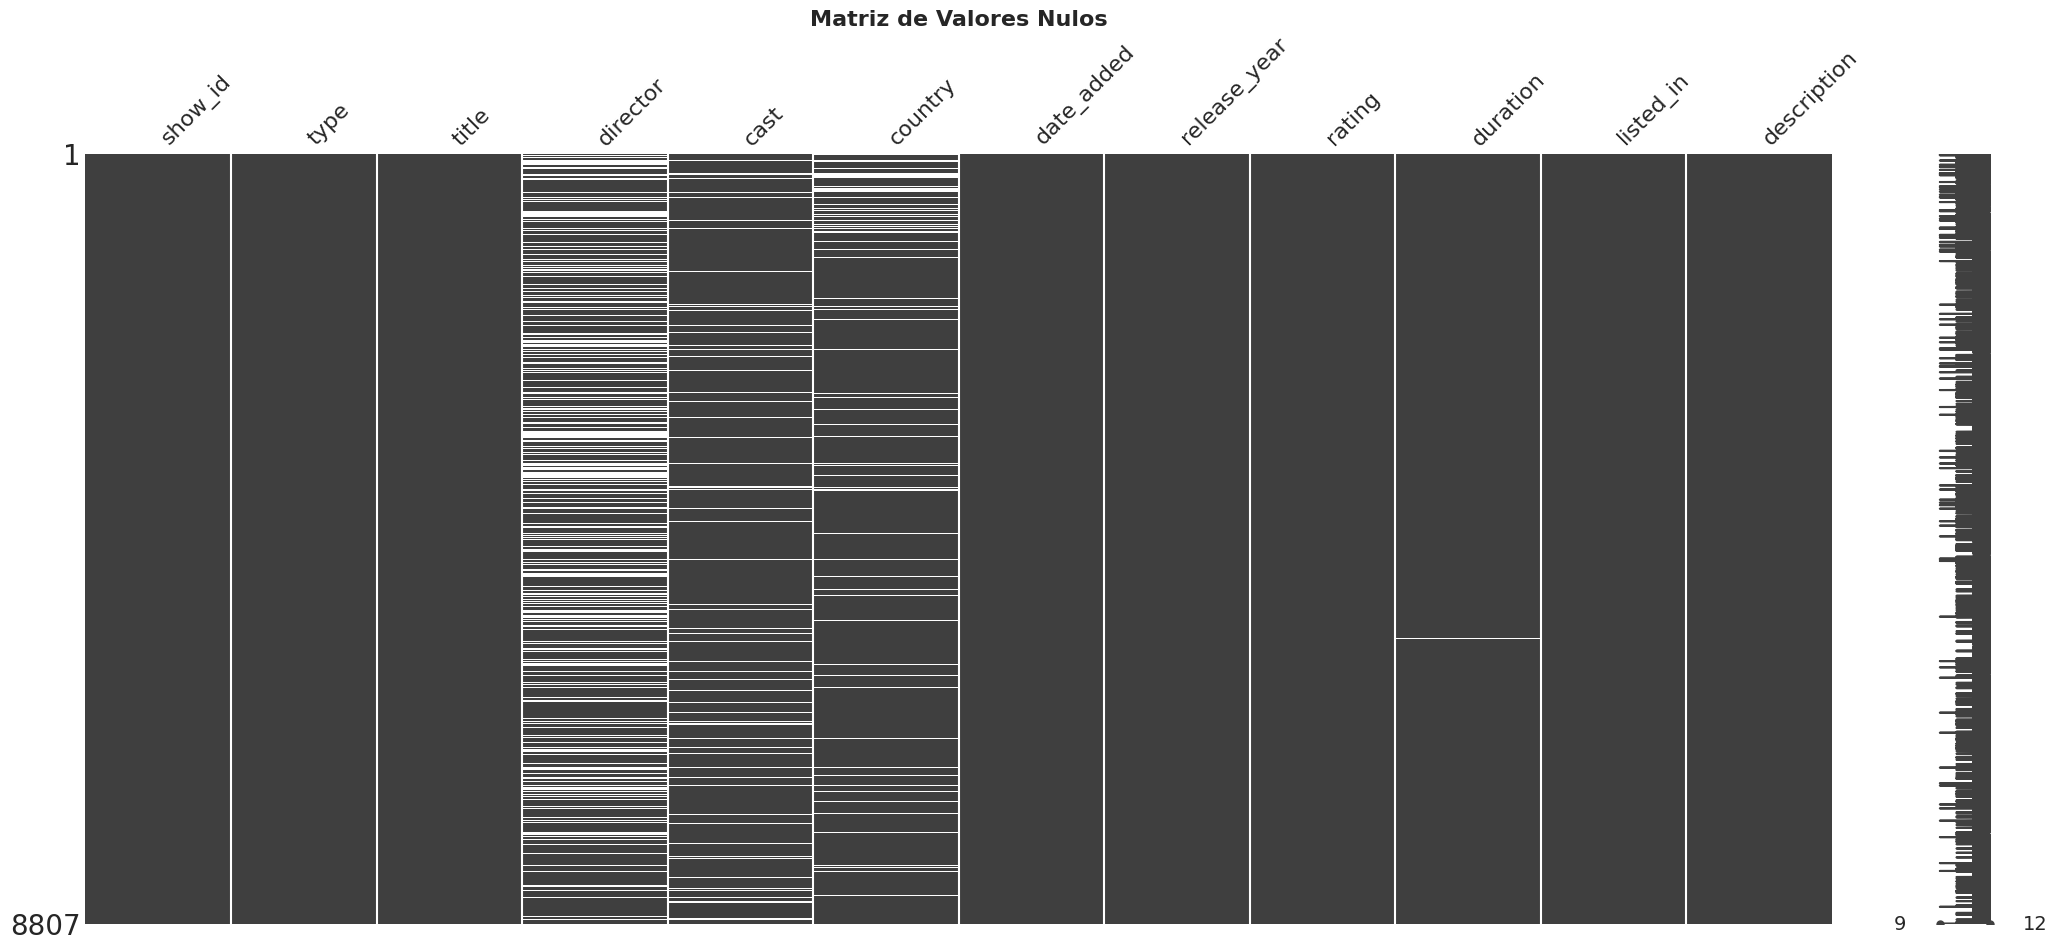

In [6]:
# Visualizaci√≥n de valores nulos
plt.figure(figsize=(14, 6))
msno.matrix(df)
plt.title('Matriz de Valores Nulos', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [7]:
# An√°lisis de duplicados
print("\n" + "="*80)
print("AN√ÅLISIS DE DUPLICADOS")
print("="*80)
duplicados = df.duplicated().sum()
print(f"Registros duplicados: {duplicados}")

# Duplicados por t√≠tulo
duplicados_titulo = df[df.duplicated(subset=['title'], keep=False)].sort_values('title')
print(f"\nT√≠tulos duplicados: {len(duplicados_titulo)}")
if len(duplicados_titulo) > 0:
    print("\nEjemplos de t√≠tulos duplicados:")
    print(duplicados_titulo[['title', 'type', 'release_year', 'country']].head(10))


AN√ÅLISIS DE DUPLICADOS
Registros duplicados: 0

T√≠tulos duplicados: 0


## 4. An√°lisis de Negocio - Distribuci√≥n de Contenido


INSIGHT #1: DISTRIBUCI√ìN DE CONTENIDO - MOVIES VS TV SHOWS

Total de contenido:
  Movie: 6,131 (69.62%)
  TV Show: 2,676 (30.38%)


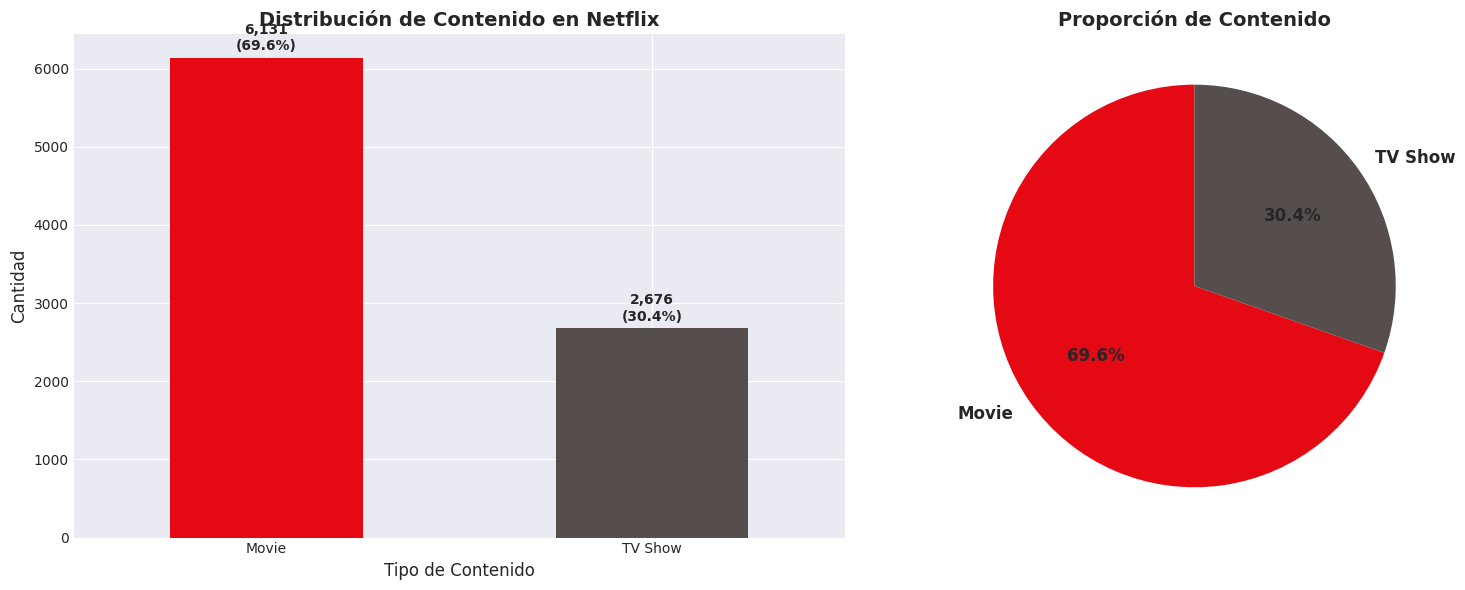


üìä INSIGHT CLAVE: Netflix tiene un cat√°logo dominado por pel√≠culas (69.6%) sobre series (30.4%)


In [8]:
# Distribuci√≥n Movies vs TV Shows
print("\n" + "="*80)
print("INSIGHT #1: DISTRIBUCI√ìN DE CONTENIDO - MOVIES VS TV SHOWS")
print("="*80)

content_distribution = df['type'].value_counts()
content_pct = df['type'].value_counts(normalize=True) * 100

print(f"\nTotal de contenido:")
for tipo, count in content_distribution.items():
    print(f"  {tipo}: {count:,} ({content_pct[tipo]:.2f}%)")

# Visualizaci√≥n
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gr√°fico de barras
ax1 = axes[0]
content_distribution.plot(kind='bar', ax=ax1, color=['#E50914', '#564d4d'])
ax1.set_title('Distribuci√≥n de Contenido en Netflix', fontsize=14, fontweight='bold')
ax1.set_xlabel('Tipo de Contenido', fontsize=12)
ax1.set_ylabel('Cantidad', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
for i, v in enumerate(content_distribution):
    ax1.text(i, v + 100, f'{v:,}\n({content_pct.iloc[i]:.1f}%)', ha='center', fontweight='bold')

# Gr√°fico de torta
ax2 = axes[1]
colors = ['#E50914', '#564d4d']
ax2.pie(content_distribution, labels=content_distribution.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_title('Proporci√≥n de Contenido', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nüìä INSIGHT CLAVE: Netflix tiene un cat√°logo dominado por pel√≠culas ({content_pct['Movie']:.1f}%) sobre series ({content_pct['TV Show']:.1f}%)")

## 5. An√°lisis Temporal - Evoluci√≥n del Contenido

In [9]:
# An√°lisis de a√±os de lanzamiento
print("\n" + "="*80)
print("INSIGHT #2: AN√ÅLISIS TEMPORAL - A√ëOS DE LANZAMIENTO")
print("="*80)

print(f"\nRango de a√±os de lanzamiento: {df['release_year'].min()} - {df['release_year'].max()}")
print(f"A√±o promedio de lanzamiento: {df['release_year'].mean():.0f}")
print(f"Mediana: {df['release_year'].median():.0f}")

# Contenido por d√©cada
df['decade'] = (df['release_year'] // 10) * 10
decade_dist = df.groupby(['decade', 'type']).size().unstack(fill_value=0)

print("\nContenido por d√©cada:")
print(decade_dist.tail(10))


INSIGHT #2: AN√ÅLISIS TEMPORAL - A√ëOS DE LANZAMIENTO

Rango de a√±os de lanzamiento: 1925 - 2021
A√±o promedio de lanzamiento: 2014
Mediana: 2017

Contenido por d√©cada:
type    Movie  TV Show
decade                
1920        0        1
1940       13        2
1950       11        0
1960       23        2
1970       66        4
1980      122        7
1990      241       33
2000      677      133
2010     4184     1743
2020      794      751


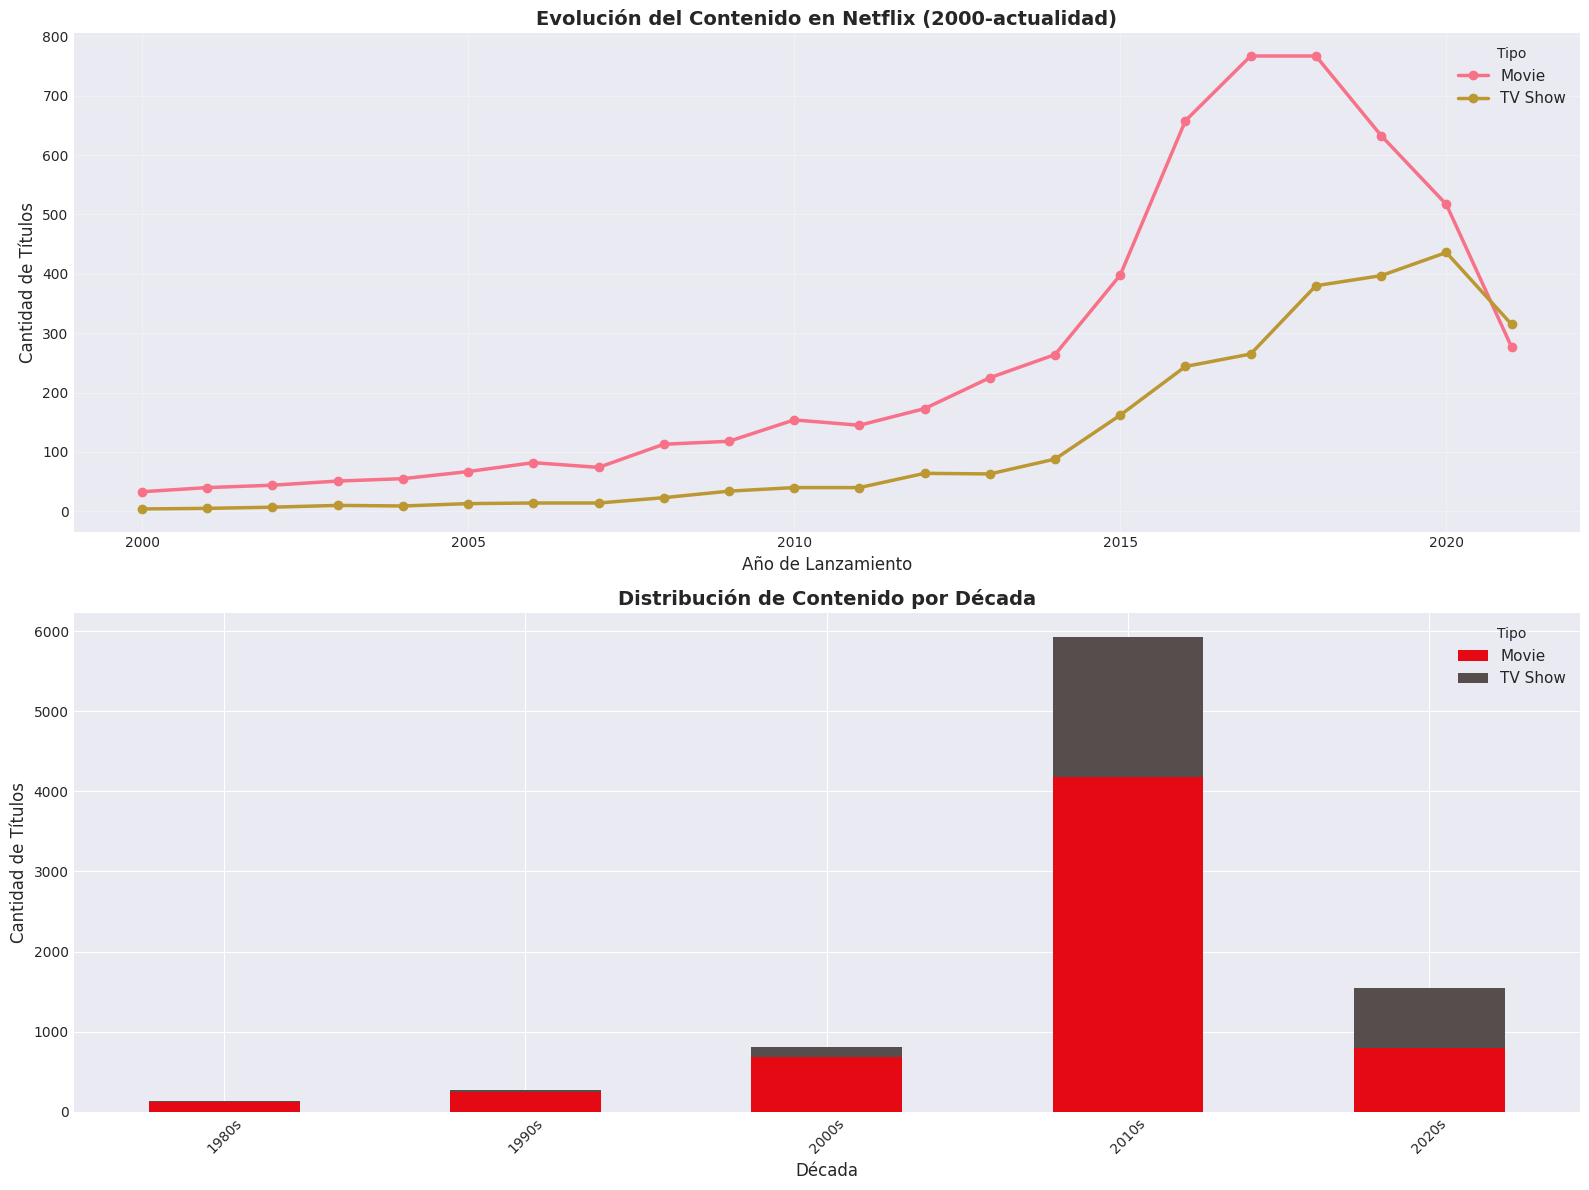


üìä INSIGHT CLAVE: Netflix tiene una fuerte presencia de contenido moderno, con un pico significativo en la √∫ltima d√©cada


In [10]:
# Visualizaci√≥n temporal
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Evoluci√≥n por a√±o
ax1 = axes[0]
year_type = df[df['release_year'] >= 2000].groupby(['release_year', 'type']).size().unstack(fill_value=0)
year_type.plot(kind='line', ax=ax1, marker='o', linewidth=2.5, markersize=6)
ax1.set_title('Evoluci√≥n del Contenido en Netflix (2000-actualidad)', fontsize=14, fontweight='bold')
ax1.set_xlabel('A√±o de Lanzamiento', fontsize=12)
ax1.set_ylabel('Cantidad de T√≠tulos', fontsize=12)
ax1.legend(title='Tipo', fontsize=11)
ax1.grid(True, alpha=0.3)

# Por d√©cada
ax2 = axes[1]
decade_dist[decade_dist.index >= 1980].plot(kind='bar', ax=ax2, stacked=True, color=['#E50914', '#564d4d'])
ax2.set_title('Distribuci√≥n de Contenido por D√©cada', fontsize=14, fontweight='bold')
ax2.set_xlabel('D√©cada', fontsize=12)
ax2.set_ylabel('Cantidad de T√≠tulos', fontsize=12)
ax2.set_xticklabels([f"{int(x)}s" for x in decade_dist[decade_dist.index >= 1980].index], rotation=45)
ax2.legend(title='Tipo', fontsize=11)

plt.tight_layout()
plt.show()

print(f"\nüìä INSIGHT CLAVE: Netflix tiene una fuerte presencia de contenido moderno, con un pico significativo en la √∫ltima d√©cada")

## 6. An√°lisis de Fecha de Adici√≥n a Netflix

In [11]:
# Preparar datos de fecha de adici√≥n
print("\n" + "="*80)
print("INSIGHT #3: AN√ÅLISIS DE ADICI√ìN DE CONTENIDO A NETFLIX")
print("="*80)

# Convertir a datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['month_name'] = df['date_added'].dt.month_name()

print(f"\nPrimera adici√≥n registrada: {df['date_added'].min()}")
print(f"√öltima adici√≥n registrada: {df['date_added'].max()}")

# Contenido a√±adido por a√±o
added_by_year = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)
print("\nContenido a√±adido por a√±o:")
print(added_by_year.tail(10))


INSIGHT #3: AN√ÅLISIS DE ADICI√ìN DE CONTENIDO A NETFLIX

Primera adici√≥n registrada: 2008-01-01 00:00:00
√öltima adici√≥n registrada: 2021-09-25 00:00:00

Contenido a√±adido por a√±o:
type        Movie  TV Show
year_added                
2012.0          3        0
2013.0          6        4
2014.0         19        4
2015.0         56       17
2016.0        253      165
2017.0        839      325
2018.0       1237      388
2019.0       1424      575
2020.0       1284      594
2021.0        993      505


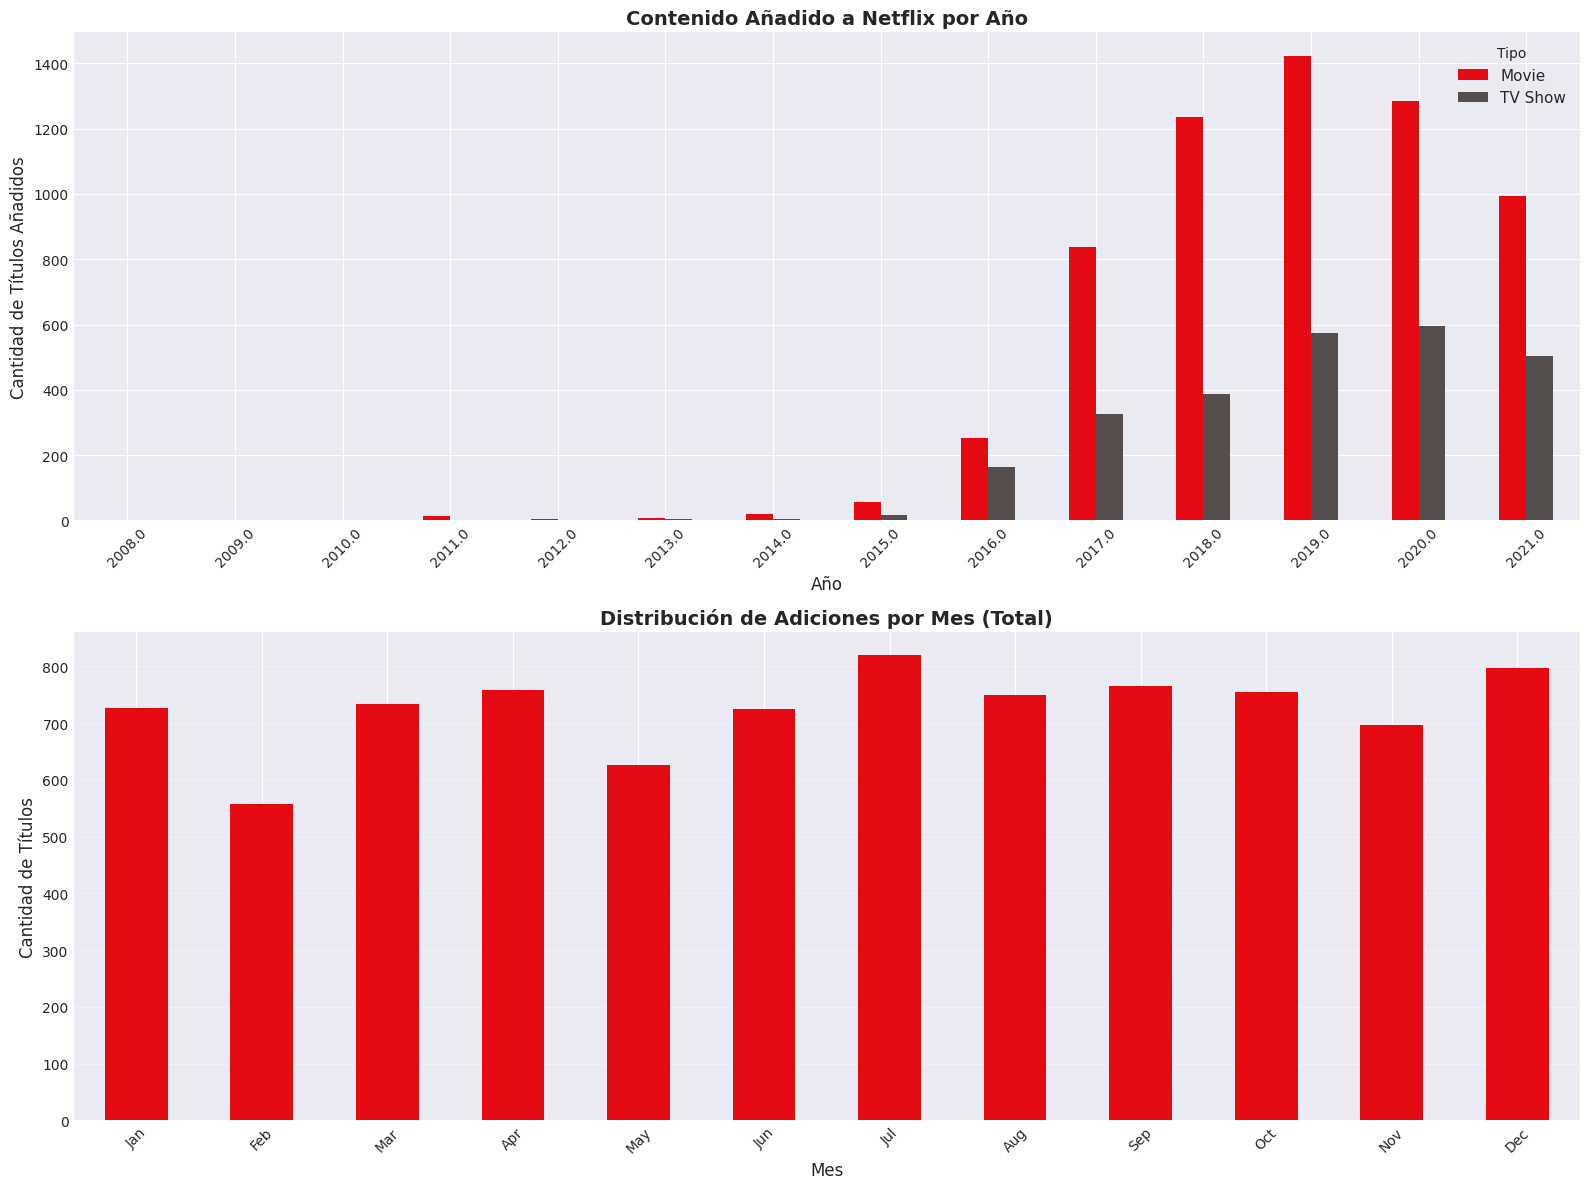


üìä INSIGHT CLAVE: Netflix ha incrementado significativamente la adici√≥n de contenido en los √∫ltimos a√±os


In [12]:
# Visualizaci√≥n de adiciones
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Por a√±o
ax1 = axes[0]
added_by_year.plot(kind='bar', ax=ax1, color=['#E50914', '#564d4d'])
ax1.set_title('Contenido A√±adido a Netflix por A√±o', fontsize=14, fontweight='bold')
ax1.set_xlabel('A√±o', fontsize=12)
ax1.set_ylabel('Cantidad de T√≠tulos A√±adidos', fontsize=12)
ax1.legend(title='Tipo', fontsize=11)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Por mes (promedio)
ax2 = axes[1]
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
month_dist = df.groupby('month_name').size().reindex(month_order)
month_dist.plot(kind='bar', ax=ax2, color='#E50914')
ax2.set_title('Distribuci√≥n de Adiciones por Mes (Total)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Mes', fontsize=12)
ax2.set_ylabel('Cantidad de T√≠tulos', fontsize=12)
ax2.set_xticklabels([m[:3] for m in month_order], rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\nüìä INSIGHT CLAVE: Netflix ha incrementado significativamente la adici√≥n de contenido en los √∫ltimos a√±os")

## 7. An√°lisis Geogr√°fico - Pa√≠ses Productores

In [13]:
# An√°lisis de pa√≠ses
print("\n" + "="*80)
print("INSIGHT #4: AN√ÅLISIS GEOGR√ÅFICO - PA√çSES PRODUCTORES")
print("="*80)

# Separar pa√≠ses (algunos t√≠tulos tienen m√∫ltiples pa√≠ses)
countries_list = df['country'].dropna().str.split(', ').explode()
top_countries = countries_list.value_counts().head(20)

print("\nTop 20 pa√≠ses productores:")
for i, (country, count) in enumerate(top_countries.items(), 1):
    print(f"{i:2d}. {country:30s}: {count:5,} t√≠tulos ({count/len(df)*100:5.2f}%)")

# Top pa√≠ses por tipo de contenido
df_countries = df.dropna(subset=['country']).copy()
df_countries['country_main'] = df_countries['country'].str.split(',').str[0].str.strip()
country_type = df_countries.groupby(['country_main', 'type']).size().unstack(fill_value=0)
top_countries_type = country_type.loc[country_type.sum(axis=1).nlargest(15).index]


INSIGHT #4: AN√ÅLISIS GEOGR√ÅFICO - PA√çSES PRODUCTORES

Top 20 pa√≠ses productores:
 1. United States                 : 3,689 t√≠tulos (41.89%)
 2. India                         : 1,046 t√≠tulos (11.88%)
 3. United Kingdom                :   804 t√≠tulos ( 9.13%)
 4. Canada                        :   445 t√≠tulos ( 5.05%)
 5. France                        :   393 t√≠tulos ( 4.46%)
 6. Japan                         :   318 t√≠tulos ( 3.61%)
 7. Spain                         :   232 t√≠tulos ( 2.63%)
 8. South Korea                   :   231 t√≠tulos ( 2.62%)
 9. Germany                       :   226 t√≠tulos ( 2.57%)
10. Mexico                        :   169 t√≠tulos ( 1.92%)
11. China                         :   162 t√≠tulos ( 1.84%)
12. Australia                     :   160 t√≠tulos ( 1.82%)
13. Egypt                         :   117 t√≠tulos ( 1.33%)
14. Turkey                        :   113 t√≠tulos ( 1.28%)
15. Hong Kong                     :   105 t√≠tulos ( 1.19%)
16. Nigeria   

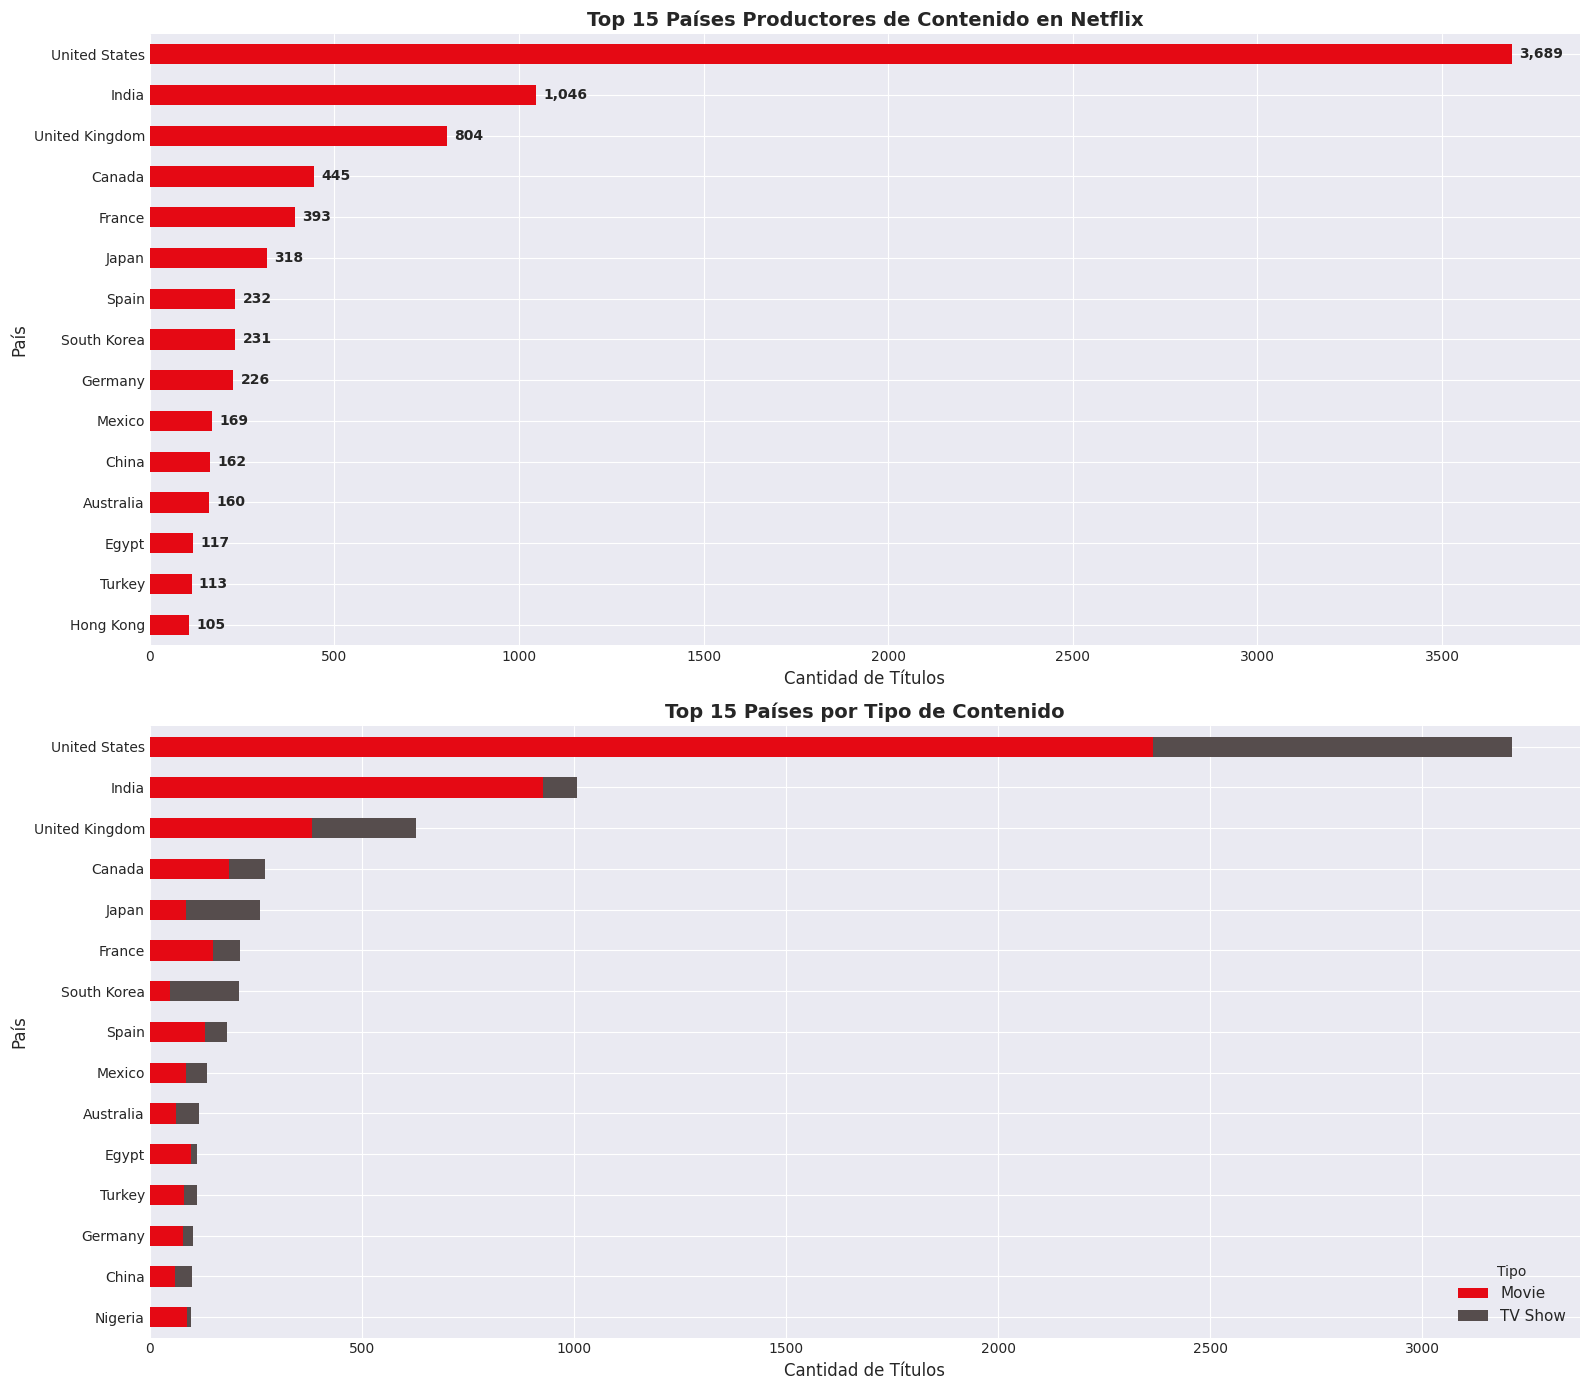


üìä INSIGHT CLAVE: Estados Unidos domina la producci√≥n de contenido, seguido por India y Reino Unido


In [14]:
# Visualizaci√≥n geogr√°fica
fig, axes = plt.subplots(2, 1, figsize=(16, 14))

# Top 15 pa√≠ses
ax1 = axes[0]
top_countries.head(15).plot(kind='barh', ax=ax1, color='#E50914')
ax1.set_title('Top 15 Pa√≠ses Productores de Contenido en Netflix', fontsize=14, fontweight='bold')
ax1.set_xlabel('Cantidad de T√≠tulos', fontsize=12)
ax1.set_ylabel('Pa√≠s', fontsize=12)
ax1.invert_yaxis()
for i, v in enumerate(top_countries.head(15)):
    ax1.text(v + 20, i, f'{v:,}', va='center', fontweight='bold')

# Por tipo de contenido
ax2 = axes[1]
top_countries_type.plot(kind='barh', stacked=True, ax=ax2, color=['#E50914', '#564d4d'])
ax2.set_title('Top 15 Pa√≠ses por Tipo de Contenido', fontsize=14, fontweight='bold')
ax2.set_xlabel('Cantidad de T√≠tulos', fontsize=12)
ax2.set_ylabel('Pa√≠s', fontsize=12)
ax2.invert_yaxis()
ax2.legend(title='Tipo', fontsize=11)

plt.tight_layout()
plt.show()

print(f"\nüìä INSIGHT CLAVE: Estados Unidos domina la producci√≥n de contenido, seguido por India y Reino Unido")

## 8. An√°lisis de Ratings (Clasificaci√≥n por Edades)

In [15]:
# An√°lisis de ratings
print("\n" + "="*80)
print("INSIGHT #5: AN√ÅLISIS DE RATINGS (CLASIFICACI√ìN POR EDADES)")
print("="*80)

rating_dist = df['rating'].value_counts()
print("\nDistribuci√≥n de ratings:")
for rating, count in rating_dist.items():
    print(f"  {rating:10s}: {count:5,} ({count/len(df)*100:5.2f}%)")

# Ratings por tipo
rating_type = df.groupby(['rating', 'type']).size().unstack(fill_value=0)
top_ratings = rating_type.sum(axis=1).nlargest(10).index
rating_type_top = rating_type.loc[top_ratings]


INSIGHT #5: AN√ÅLISIS DE RATINGS (CLASIFICACI√ìN POR EDADES)

Distribuci√≥n de ratings:
  TV-MA     : 3,207 (36.41%)
  TV-14     : 2,160 (24.53%)
  TV-PG     :   863 ( 9.80%)
  R         :   799 ( 9.07%)
  PG-13     :   490 ( 5.56%)
  TV-Y7     :   334 ( 3.79%)
  TV-Y      :   307 ( 3.49%)
  PG        :   287 ( 3.26%)
  TV-G      :   220 ( 2.50%)
  NR        :    80 ( 0.91%)
  G         :    41 ( 0.47%)
  TV-Y7-FV  :     6 ( 0.07%)
  NC-17     :     3 ( 0.03%)
  UR        :     3 ( 0.03%)
  74 min    :     1 ( 0.01%)
  84 min    :     1 ( 0.01%)
  66 min    :     1 ( 0.01%)


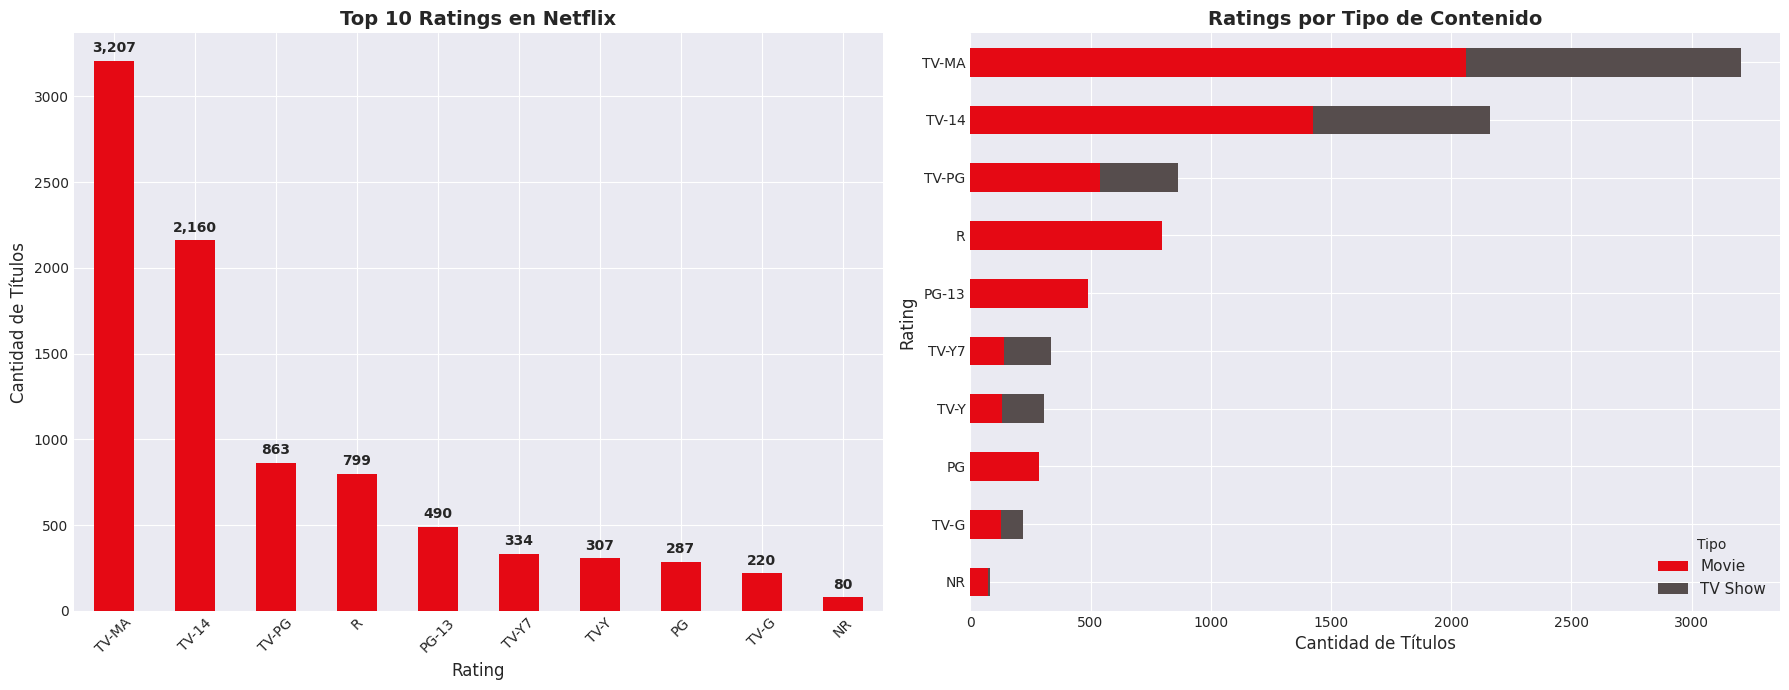


üìä INSIGHT CLAVE: El contenido para adultos (TV-MA, R) y adolescentes (TV-14, PG-13) domina el cat√°logo


In [16]:
# Visualizaci√≥n de ratings
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Distribuci√≥n general
ax1 = axes[0]
rating_dist.head(10).plot(kind='bar', ax=ax1, color='#E50914')
ax1.set_title('Top 10 Ratings en Netflix', fontsize=14, fontweight='bold')
ax1.set_xlabel('Rating', fontsize=12)
ax1.set_ylabel('Cantidad de T√≠tulos', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
for i, v in enumerate(rating_dist.head(10)):
    ax1.text(i, v + 50, f'{v:,}', ha='center', fontweight='bold')

# Por tipo de contenido
ax2 = axes[1]
rating_type_top.plot(kind='barh', stacked=True, ax=ax2, color=['#E50914', '#564d4d'])
ax2.set_title('Ratings por Tipo de Contenido', fontsize=14, fontweight='bold')
ax2.set_xlabel('Cantidad de T√≠tulos', fontsize=12)
ax2.set_ylabel('Rating', fontsize=12)
ax2.invert_yaxis()
ax2.legend(title='Tipo', fontsize=11)

plt.tight_layout()
plt.show()

print(f"\nüìä INSIGHT CLAVE: El contenido para adultos (TV-MA, R) y adolescentes (TV-14, PG-13) domina el cat√°logo")

## 9. An√°lisis de Duraci√≥n

In [17]:
# An√°lisis de duraci√≥n
print("\n" + "="*80)
print("INSIGHT #6: AN√ÅLISIS DE DURACI√ìN")
print("="*80)

# Separar pel√≠culas y series
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()

# Extraer duraci√≥n num√©rica
movies['duration_min'] = movies['duration'].str.extract(r'(\d+)').astype(float)
tv_shows['seasons'] = tv_shows['duration'].str.extract(r'(\d+)').astype(float)

print("\nPEL√çCULAS:")
print(f"  Duraci√≥n promedio: {movies['duration_min'].mean():.1f} minutos")
print(f"  Duraci√≥n mediana: {movies['duration_min'].median():.1f} minutos")
print(f"  Duraci√≥n m√≠nima: {movies['duration_min'].min():.0f} minutos")
print(f"  Duraci√≥n m√°xima: {movies['duration_min'].max():.0f} minutos")

print("\nTV SHOWS:")
print(f"  Temporadas promedio: {tv_shows['seasons'].mean():.1f}")
print(f"  Temporadas mediana: {tv_shows['seasons'].median():.0f}")
print(f"  M√≠nimo de temporadas: {tv_shows['seasons'].min():.0f}")
print(f"  M√°ximo de temporadas: {tv_shows['seasons'].max():.0f}")

# Distribuci√≥n de temporadas
seasons_dist = tv_shows['seasons'].value_counts().sort_index()
print("\nDistribuci√≥n de temporadas:")
for season, count in seasons_dist.head(10).items():
    print(f"  {season:.0f} temporada(s): {count:4,} shows ({count/len(tv_shows)*100:5.2f}%)")


INSIGHT #6: AN√ÅLISIS DE DURACI√ìN

PEL√çCULAS:
  Duraci√≥n promedio: 99.6 minutos
  Duraci√≥n mediana: 98.0 minutos
  Duraci√≥n m√≠nima: 3 minutos
  Duraci√≥n m√°xima: 312 minutos

TV SHOWS:
  Temporadas promedio: 1.8
  Temporadas mediana: 1
  M√≠nimo de temporadas: 1
  M√°ximo de temporadas: 17

Distribuci√≥n de temporadas:
  1 temporada(s): 1,793 shows (67.00%)
  2 temporada(s):  425 shows (15.88%)
  3 temporada(s):  199 shows ( 7.44%)
  4 temporada(s):   95 shows ( 3.55%)
  5 temporada(s):   65 shows ( 2.43%)
  6 temporada(s):   33 shows ( 1.23%)
  7 temporada(s):   23 shows ( 0.86%)
  8 temporada(s):   17 shows ( 0.64%)
  9 temporada(s):    9 shows ( 0.34%)
  10 temporada(s):    7 shows ( 0.26%)


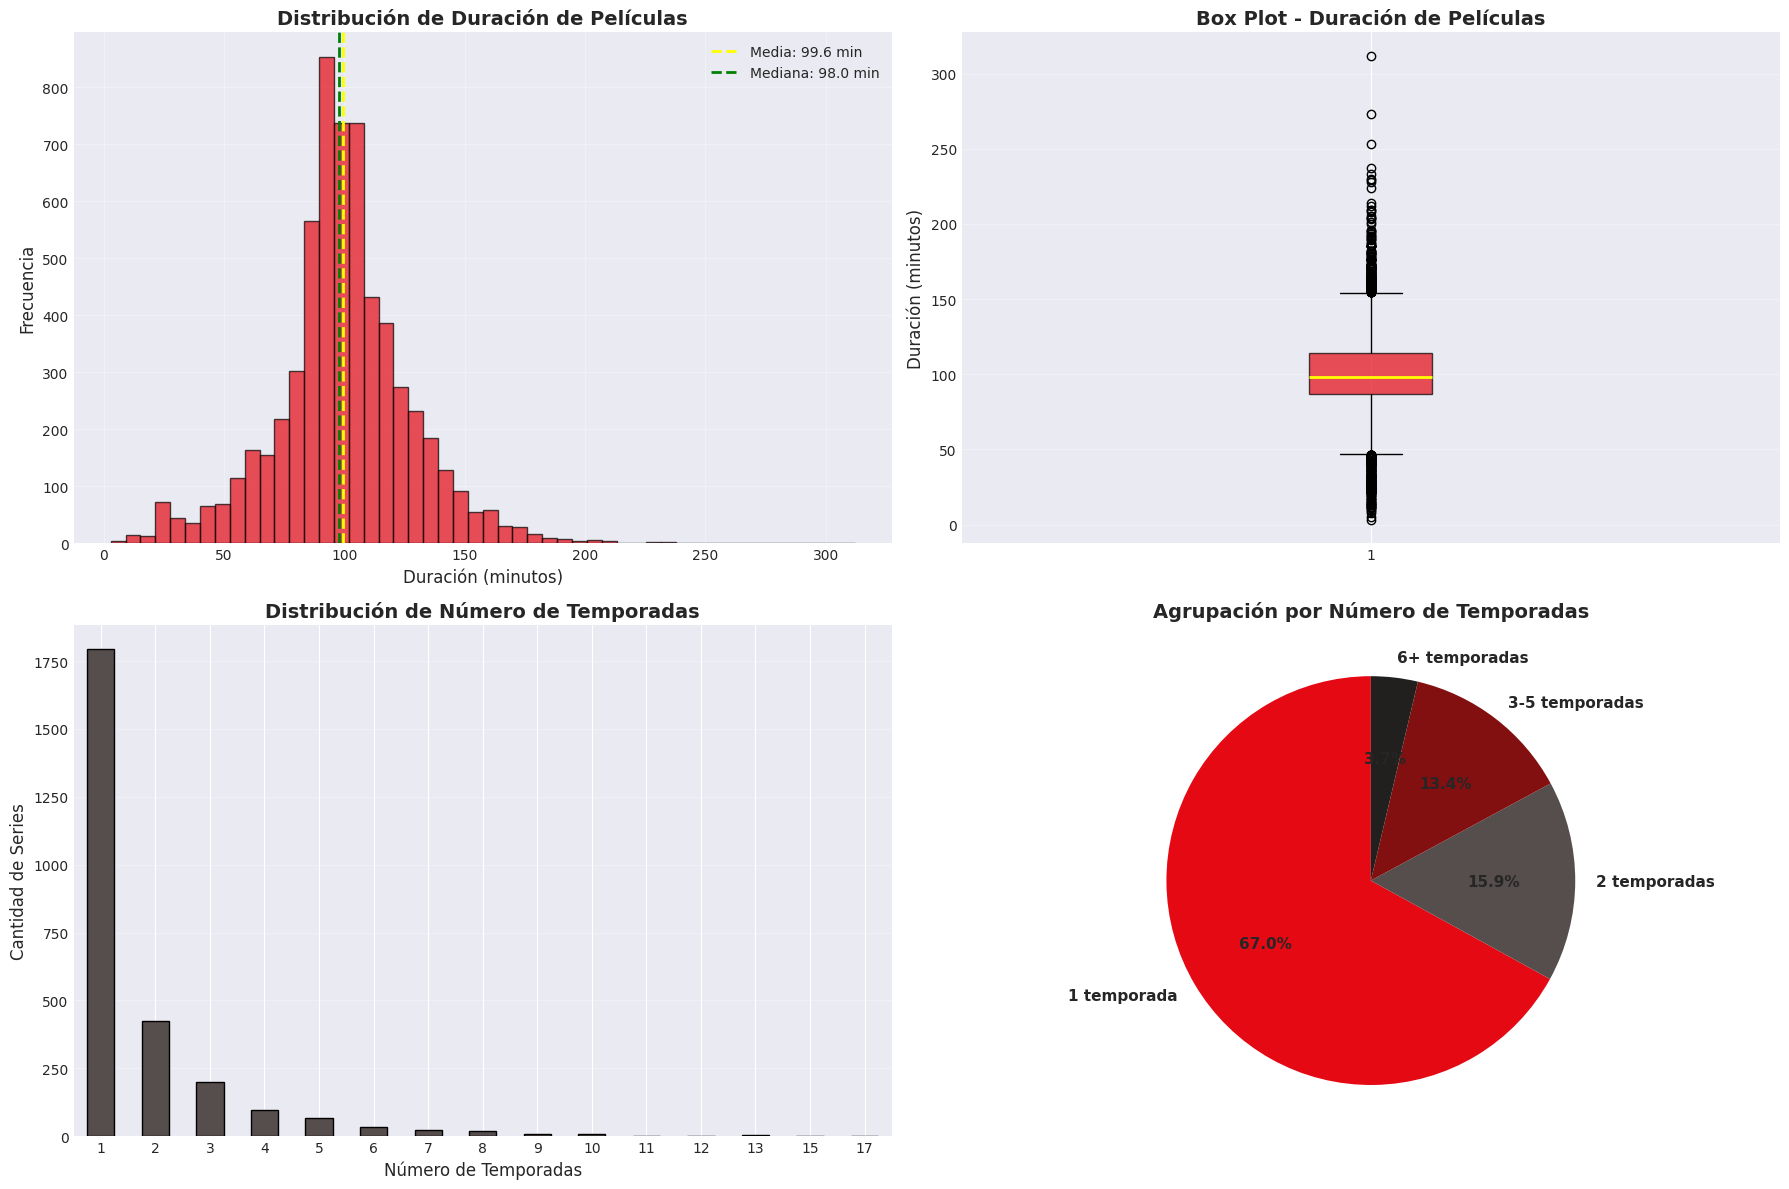


üìä INSIGHT CLAVE: Las pel√≠culas tienen una duraci√≥n promedio de ~100 min, y la mayor√≠a de series tienen 1 temporada


In [18]:
# Visualizaci√≥n de duraci√≥n
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Distribuci√≥n de duraci√≥n de pel√≠culas
ax1 = axes[0, 0]
ax1.hist(movies['duration_min'].dropna(), bins=50, color='#E50914', edgecolor='black', alpha=0.7)
ax1.axvline(movies['duration_min'].mean(), color='yellow', linestyle='--', linewidth=2, label=f"Media: {movies['duration_min'].mean():.1f} min")
ax1.axvline(movies['duration_min'].median(), color='green', linestyle='--', linewidth=2, label=f"Mediana: {movies['duration_min'].median():.1f} min")
ax1.set_title('Distribuci√≥n de Duraci√≥n de Pel√≠culas', fontsize=14, fontweight='bold')
ax1.set_xlabel('Duraci√≥n (minutos)', fontsize=12)
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box plot de duraci√≥n de pel√≠culas
ax2 = axes[0, 1]
ax2.boxplot(movies['duration_min'].dropna(), vert=True, patch_artist=True,
            boxprops=dict(facecolor='#E50914', alpha=0.7),
            medianprops=dict(color='yellow', linewidth=2))
ax2.set_title('Box Plot - Duraci√≥n de Pel√≠culas', fontsize=14, fontweight='bold')
ax2.set_ylabel('Duraci√≥n (minutos)', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')

# Distribuci√≥n de temporadas
ax3 = axes[1, 0]
seasons_dist.head(15).plot(kind='bar', ax=ax3, color='#564d4d', edgecolor='black')
ax3.set_title('Distribuci√≥n de N√∫mero de Temporadas', fontsize=14, fontweight='bold')
ax3.set_xlabel('N√∫mero de Temporadas', fontsize=12)
ax3.set_ylabel('Cantidad de Series', fontsize=12)
ax3.set_xticklabels([f"{int(float(x.get_text()))}" for x in ax3.get_xticklabels()], rotation=0)
ax3.grid(True, alpha=0.3, axis='y')

# Pie chart de temporadas (1 vs m√∫ltiples)
ax4 = axes[1, 1]
season_groups = pd.cut(tv_shows['seasons'], bins=[0, 1, 2, 5, 100], 
                       labels=['1 temporada', '2 temporadas', '3-5 temporadas', '6+ temporadas'])
season_groups.value_counts().plot(kind='pie', ax=ax4, autopct='%1.1f%%', startangle=90,
                                  colors=['#E50914', '#564d4d', '#831010', '#221f1f'],
                                  textprops={'fontsize': 11, 'fontweight': 'bold'})
ax4.set_title('Agrupaci√≥n por N√∫mero de Temporadas', fontsize=14, fontweight='bold')
ax4.set_ylabel('')

plt.tight_layout()
plt.show()

print(f"\nüìä INSIGHT CLAVE: Las pel√≠culas tienen una duraci√≥n promedio de ~{movies['duration_min'].mean():.0f} min, y la mayor√≠a de series tienen 1 temporada")

## 10. An√°lisis de G√©neros

In [19]:
# An√°lisis de g√©neros
print("\n" + "="*80)
print("INSIGHT #7: AN√ÅLISIS DE G√âNEROS")
print("="*80)

# Separar g√©neros (algunos t√≠tulos tienen m√∫ltiples g√©neros)
genres_list = df['listed_in'].dropna().str.split(', ').explode()
top_genres = genres_list.value_counts().head(20)

print("\nTop 20 g√©neros:")
for i, (genre, count) in enumerate(top_genres.items(), 1):
    print(f"{i:2d}. {genre:40s}: {count:5,} t√≠tulos ({count/len(df)*100:5.2f}%)")


INSIGHT #7: AN√ÅLISIS DE G√âNEROS

Top 20 g√©neros:
 1. International Movies                    : 2,752 t√≠tulos (31.25%)
 2. Dramas                                  : 2,427 t√≠tulos (27.56%)
 3. Comedies                                : 1,674 t√≠tulos (19.01%)
 4. International TV Shows                  : 1,351 t√≠tulos (15.34%)
 5. Documentaries                           :   869 t√≠tulos ( 9.87%)
 6. Action & Adventure                      :   859 t√≠tulos ( 9.75%)
 7. TV Dramas                               :   763 t√≠tulos ( 8.66%)
 8. Independent Movies                      :   756 t√≠tulos ( 8.58%)
 9. Children & Family Movies                :   641 t√≠tulos ( 7.28%)
10. Romantic Movies                         :   616 t√≠tulos ( 6.99%)
11. TV Comedies                             :   581 t√≠tulos ( 6.60%)
12. Thrillers                               :   577 t√≠tulos ( 6.55%)
13. Crime TV Shows                          :   470 t√≠tulos ( 5.34%)
14. Kids' TV                         

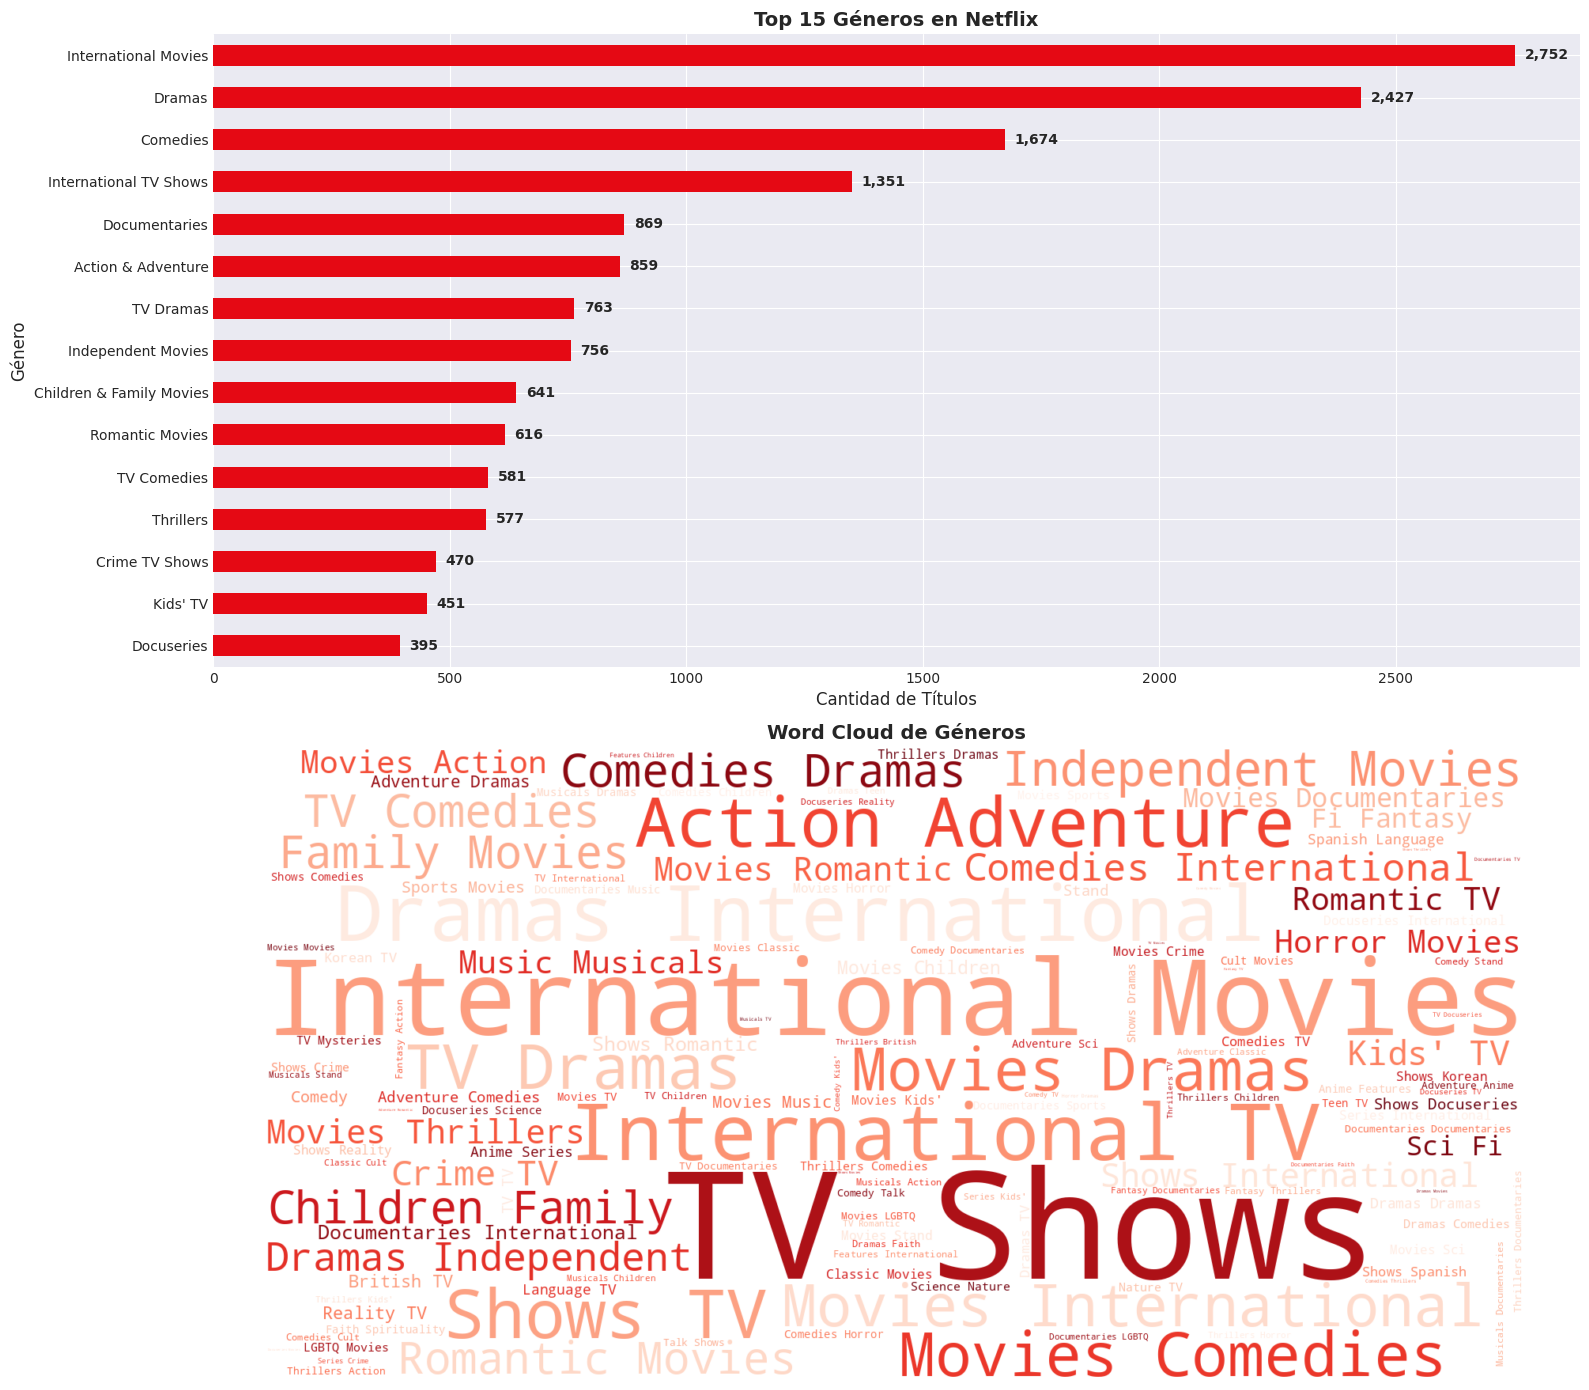


üìä INSIGHT CLAVE: Los g√©neros dominantes son dramas internacionales, comedias y documentales


In [20]:
# Visualizaci√≥n de g√©neros
fig, axes = plt.subplots(2, 1, figsize=(16, 14))

# Top g√©neros
ax1 = axes[0]
top_genres.head(15).plot(kind='barh', ax=ax1, color='#E50914')
ax1.set_title('Top 15 G√©neros en Netflix', fontsize=14, fontweight='bold')
ax1.set_xlabel('Cantidad de T√≠tulos', fontsize=12)
ax1.set_ylabel('G√©nero', fontsize=12)
ax1.invert_yaxis()
for i, v in enumerate(top_genres.head(15)):
    ax1.text(v + 20, i, f'{v:,}', va='center', fontweight='bold')

# WordCloud de g√©neros
ax2 = axes[1]
genre_text = ' '.join(genres_list.astype(str))
wordcloud = WordCloud(width=1600, height=800, background_color='white', 
                      colormap='Reds', relative_scaling=0.5).generate(genre_text)
ax2.imshow(wordcloud, interpolation='bilinear')
ax2.set_title('Word Cloud de G√©neros', fontsize=14, fontweight='bold')
ax2.axis('off')

plt.tight_layout()
plt.show()

print(f"\nüìä INSIGHT CLAVE: Los g√©neros dominantes son dramas internacionales, comedias y documentales")

## 11. An√°lisis de Directores y Actores

In [21]:
# An√°lisis de directores
print("\n" + "="*80)
print("INSIGHT #8: TOP DIRECTORES Y ACTORES")
print("="*80)

# Top directores
directors_list = df['director'].dropna().str.split(', ').explode()
top_directors = directors_list.value_counts().head(20)

print("\nTop 20 directores con m√°s contenido:")
for i, (director, count) in enumerate(top_directors.items(), 1):
    print(f"{i:2d}. {director:40s}: {count:3,} t√≠tulos")

# Top actores
cast_list = df['cast'].dropna().str.split(', ').explode()
top_cast = cast_list.value_counts().head(20)

print("\nTop 20 actores con m√°s apariciones:")
for i, (actor, count) in enumerate(top_cast.items(), 1):
    print(f"{i:2d}. {actor:40s}: {count:3,} t√≠tulos")


INSIGHT #8: TOP DIRECTORES Y ACTORES

Top 20 directores con m√°s contenido:
 1. Rajiv Chilaka                           :  22 t√≠tulos
 2. Jan Suter                               :  21 t√≠tulos
 3. Ra√∫l Campos                             :  19 t√≠tulos
 4. Suhas Kadav                             :  16 t√≠tulos
 5. Marcus Raboy                            :  16 t√≠tulos
 6. Jay Karas                               :  15 t√≠tulos
 7. Cathy Garcia-Molina                     :  13 t√≠tulos
 8. Martin Scorsese                         :  12 t√≠tulos
 9. Youssef Chahine                         :  12 t√≠tulos
10. Jay Chapman                             :  12 t√≠tulos
11. Steven Spielberg                        :  11 t√≠tulos
12. Don Michael Paul                        :  10 t√≠tulos
13. Anurag Kashyap                          :   9 t√≠tulos
14. Yƒ±lmaz Erdoƒüan                          :   9 t√≠tulos
15. David Dhawan                            :   9 t√≠tulos
16. Shannon Hartman                

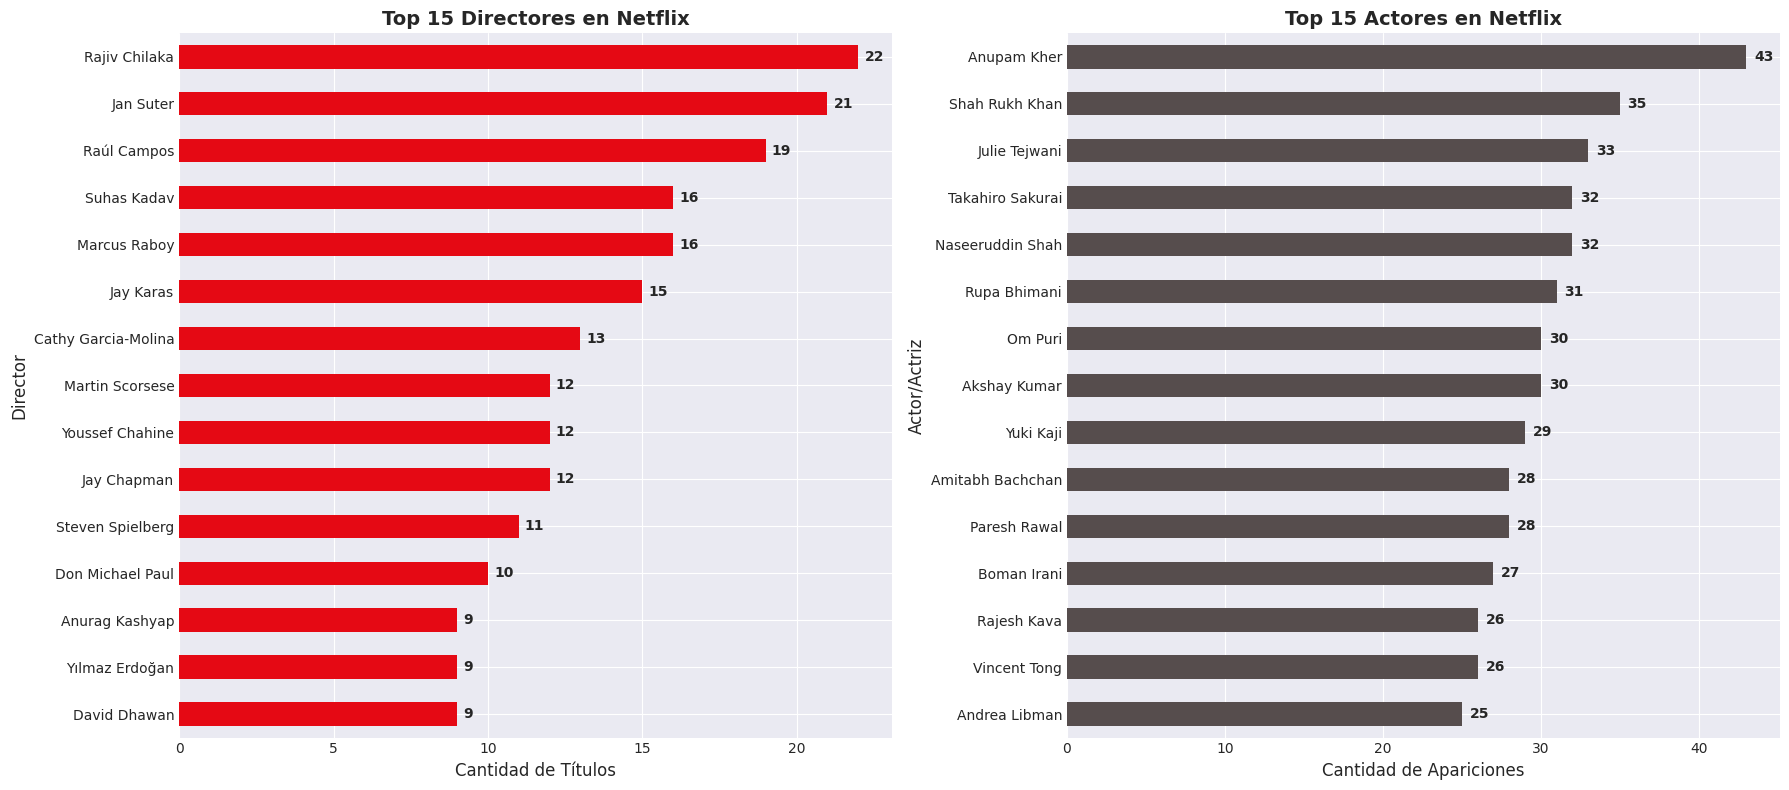


üìä INSIGHT CLAVE: Hay diversidad en directores y actores, con algunos creadores prol√≠ficos


In [22]:
# Visualizaci√≥n de directores y actores
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Top directores
ax1 = axes[0]
top_directors.head(15).plot(kind='barh', ax=ax1, color='#E50914')
ax1.set_title('Top 15 Directores en Netflix', fontsize=14, fontweight='bold')
ax1.set_xlabel('Cantidad de T√≠tulos', fontsize=12)
ax1.set_ylabel('Director', fontsize=12)
ax1.invert_yaxis()
for i, v in enumerate(top_directors.head(15)):
    ax1.text(v + 0.2, i, f'{v}', va='center', fontweight='bold')

# Top actores
ax2 = axes[1]
top_cast.head(15).plot(kind='barh', ax=ax2, color='#564d4d')
ax2.set_title('Top 15 Actores en Netflix', fontsize=14, fontweight='bold')
ax2.set_xlabel('Cantidad de Apariciones', fontsize=12)
ax2.set_ylabel('Actor/Actriz', fontsize=12)
ax2.invert_yaxis()
for i, v in enumerate(top_cast.head(15)):
    ax2.text(v + 0.5, i, f'{v}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nüìä INSIGHT CLAVE: Hay diversidad en directores y actores, con algunos creadores prol√≠ficos")

## 12. An√°lisis de Descripciones - Text Mining

In [23]:
# An√°lisis de descripciones
print("\n" + "="*80)
print("INSIGHT #9: AN√ÅLISIS DE DESCRIPCIONES (TEXT MINING)")
print("="*80)

# Longitud de descripciones
df['description_length'] = df['description'].str.len()

print(f"\nLongitud promedio de descripciones: {df['description_length'].mean():.1f} caracteres")
print(f"Longitud mediana: {df['description_length'].median():.1f} caracteres")
print(f"Longitud m√≠nima: {df['description_length'].min():.0f} caracteres")
print(f"Longitud m√°xima: {df['description_length'].max():.0f} caracteres")

# Palabras m√°s comunes en descripciones
from collections import Counter
import re

# Palabras stopwords b√°sicas
stopwords = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 
             'of', 'with', 'by', 'from', 'as', 'is', 'was', 'are', 'been', 'be',
             'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could',
             'should', 'may', 'might', 'must', 'can', 'this', 'that', 'these', 'those',
             'i', 'you', 'he', 'she', 'it', 'we', 'they', 'what', 'which', 'who',
             'when', 'where', 'why', 'how', 'all', 'each', 'every', 'both', 'few',
             'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only',
             'own', 'same', 'so', 'than', 'too', 'very', 'just', 'his', 'her', 'their'}

all_words = []
for desc in df['description'].dropna():
    words = re.findall(r'\b[a-z]+\b', desc.lower())
    all_words.extend([w for w in words if w not in stopwords and len(w) > 3])

word_freq = Counter(all_words).most_common(30)

print("\nTop 30 palabras en descripciones:")
for i, (word, count) in enumerate(word_freq, 1):
    print(f"{i:2d}. {word:20s}: {count:5,} veces")


INSIGHT #9: AN√ÅLISIS DE DESCRIPCIONES (TEXT MINING)

Longitud promedio de descripciones: 143.3 caracteres
Longitud mediana: 146.0 caracteres
Longitud m√≠nima: 61 caracteres
Longitud m√°xima: 248 caracteres

Top 30 palabras en descripciones:
 1. after               :   994 veces
 2. life                :   845 veces
 3. young               :   729 veces
 4. into                :   715 veces
 5. family              :   635 veces
 6. world               :   570 veces
 7. love                :   504 veces
 8. woman               :   486 veces
 9. friends             :   445 veces
10. series              :   396 veces
11. while               :   377 veces
12. documentary         :   365 veces
13. about               :   356 veces
14. find                :   341 veces
15. school              :   339 veces
16. them                :   319 veces
17. father              :   317 veces
18. home                :   317 veces
19. finds               :   313 veces
20. three               :   301 vec

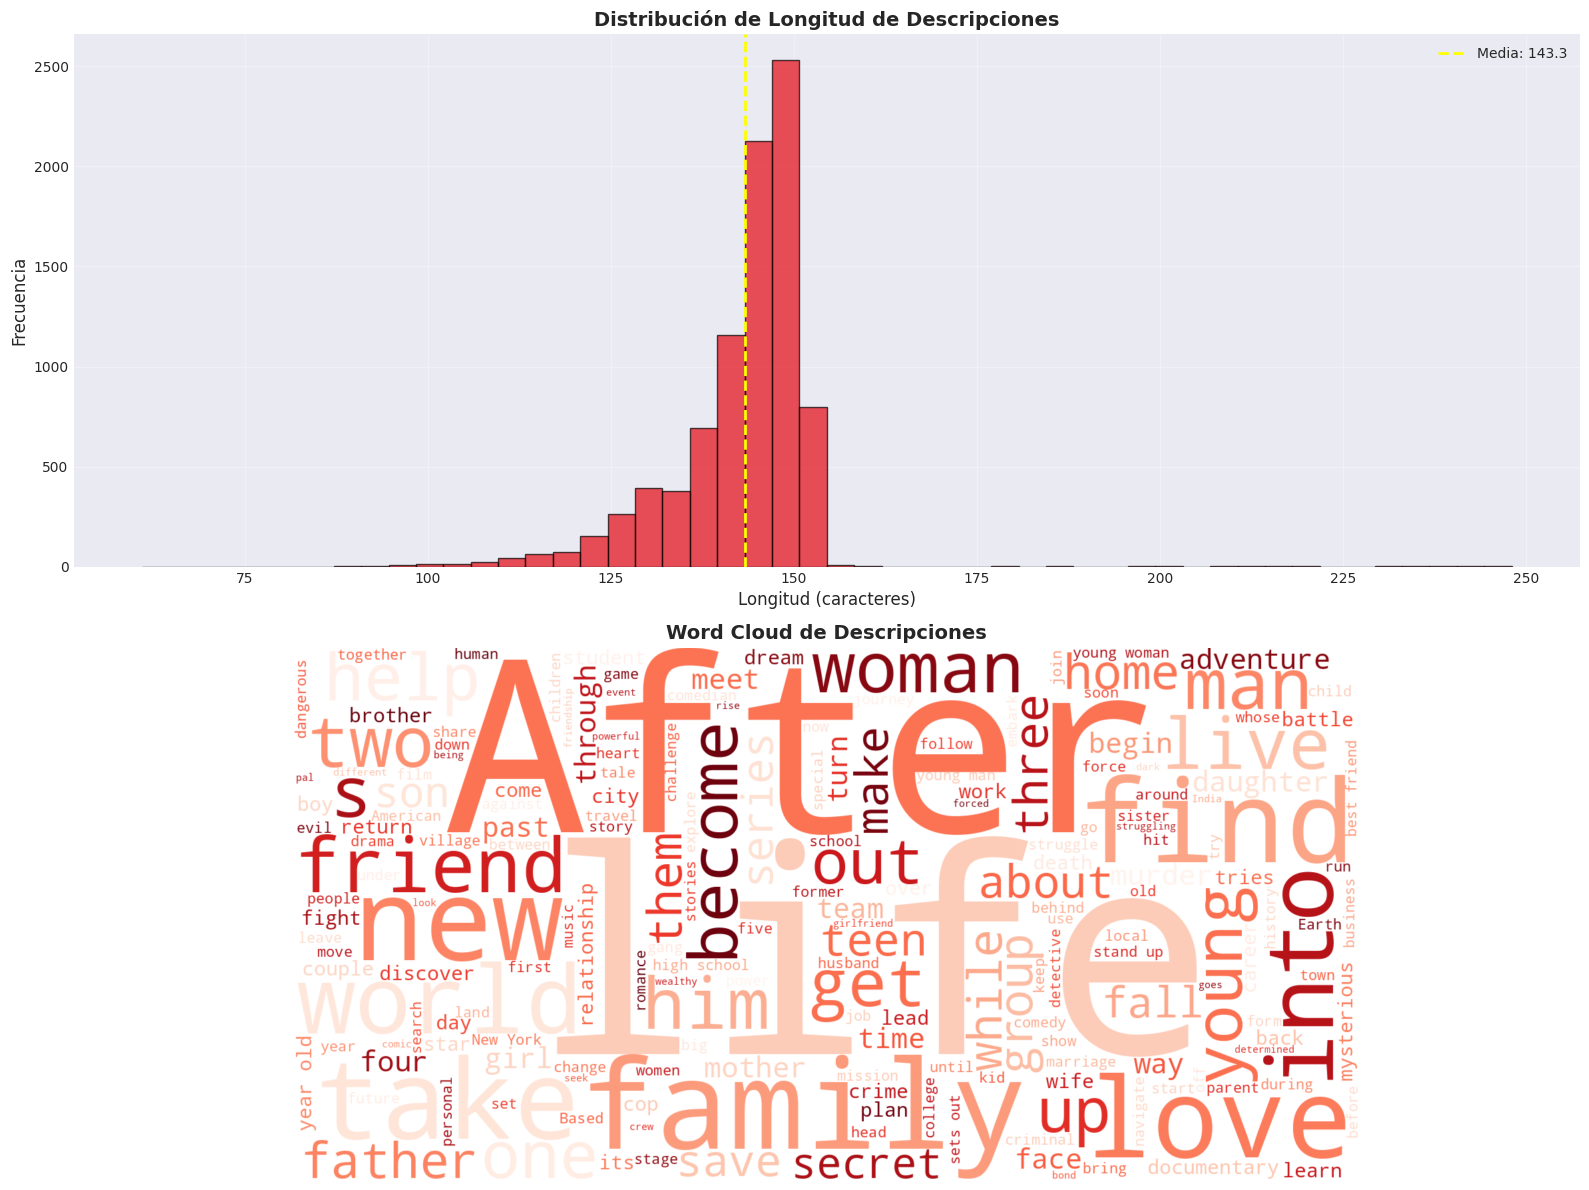


üìä INSIGHT CLAVE: Las descripciones enfatizan temas de vida, amor, familia, mundo, y nuevas experiencias


In [24]:
# Visualizaci√≥n de descripciones
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Distribuci√≥n de longitud
ax1 = axes[0]
ax1.hist(df['description_length'].dropna(), bins=50, color='#E50914', edgecolor='black', alpha=0.7)
ax1.axvline(df['description_length'].mean(), color='yellow', linestyle='--', linewidth=2, 
            label=f"Media: {df['description_length'].mean():.1f}")
ax1.set_title('Distribuci√≥n de Longitud de Descripciones', fontsize=14, fontweight='bold')
ax1.set_xlabel('Longitud (caracteres)', fontsize=12)
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# WordCloud de descripciones
ax2 = axes[1]
desc_text = ' '.join(df['description'].dropna().astype(str))
wordcloud_desc = WordCloud(width=1600, height=800, background_color='white', 
                           colormap='Reds', stopwords=stopwords, 
                           relative_scaling=0.5, min_font_size=10).generate(desc_text)
ax2.imshow(wordcloud_desc, interpolation='bilinear')
ax2.set_title('Word Cloud de Descripciones', fontsize=14, fontweight='bold')
ax2.axis('off')

plt.tight_layout()
plt.show()

print(f"\nüìä INSIGHT CLAVE: Las descripciones enfatizan temas de vida, amor, familia, mundo, y nuevas experiencias")

## 13. An√°lisis de Correlaciones y Patrones

In [25]:
# An√°lisis de patrones
print("\n" + "="*80)
print("INSIGHT #10: PATRONES Y CORRELACIONES")
print("="*80)

# Tiempo entre lanzamiento y adici√≥n a Netflix
df['time_to_netflix'] = df['year_added'] - df['release_year']

print("\nTiempo promedio entre lanzamiento y adici√≥n a Netflix:")
print(f"  Movies: {df[df['type']=='Movie']['time_to_netflix'].mean():.1f} a√±os")
print(f"  TV Shows: {df[df['type']=='TV Show']['time_to_netflix'].mean():.1f} a√±os")

# Top contenido m√°s reciente a√±adido
recent_content = df.nlargest(10, 'year_added')[['title', 'type', 'release_year', 'year_added', 'time_to_netflix']]
print("\nTop 10 contenido a√±adido m√°s recientemente:")
print(recent_content.to_string(index=False))

# Contenido cl√°sico (m√°s antiguo)
classic_content = df.nsmallest(10, 'release_year')[['title', 'type', 'release_year', 'year_added']]
print("\nTop 10 contenido m√°s antiguo en el cat√°logo:")
print(classic_content.to_string(index=False))


INSIGHT #10: PATRONES Y CORRELACIONES

Tiempo promedio entre lanzamiento y adici√≥n a Netflix:
  Movies: 5.7 a√±os
  TV Shows: 2.2 a√±os

Top 10 contenido a√±adido m√°s recientemente:
                           title    type  release_year  year_added  time_to_netflix
            Dick Johnson Is Dead   Movie          2020      2021.0              1.0
                   Blood & Water TV Show          2021      2021.0              0.0
                       Ganglands TV Show          2021      2021.0              0.0
           Jailbirds New Orleans TV Show          2021      2021.0              0.0
                    Kota Factory TV Show          2021      2021.0              0.0
                   Midnight Mass TV Show          2021      2021.0              0.0
My Little Pony: A New Generation   Movie          2021      2021.0              0.0
                         Sankofa   Movie          1993      2021.0             28.0
   The Great British Baking Show TV Show          2021     

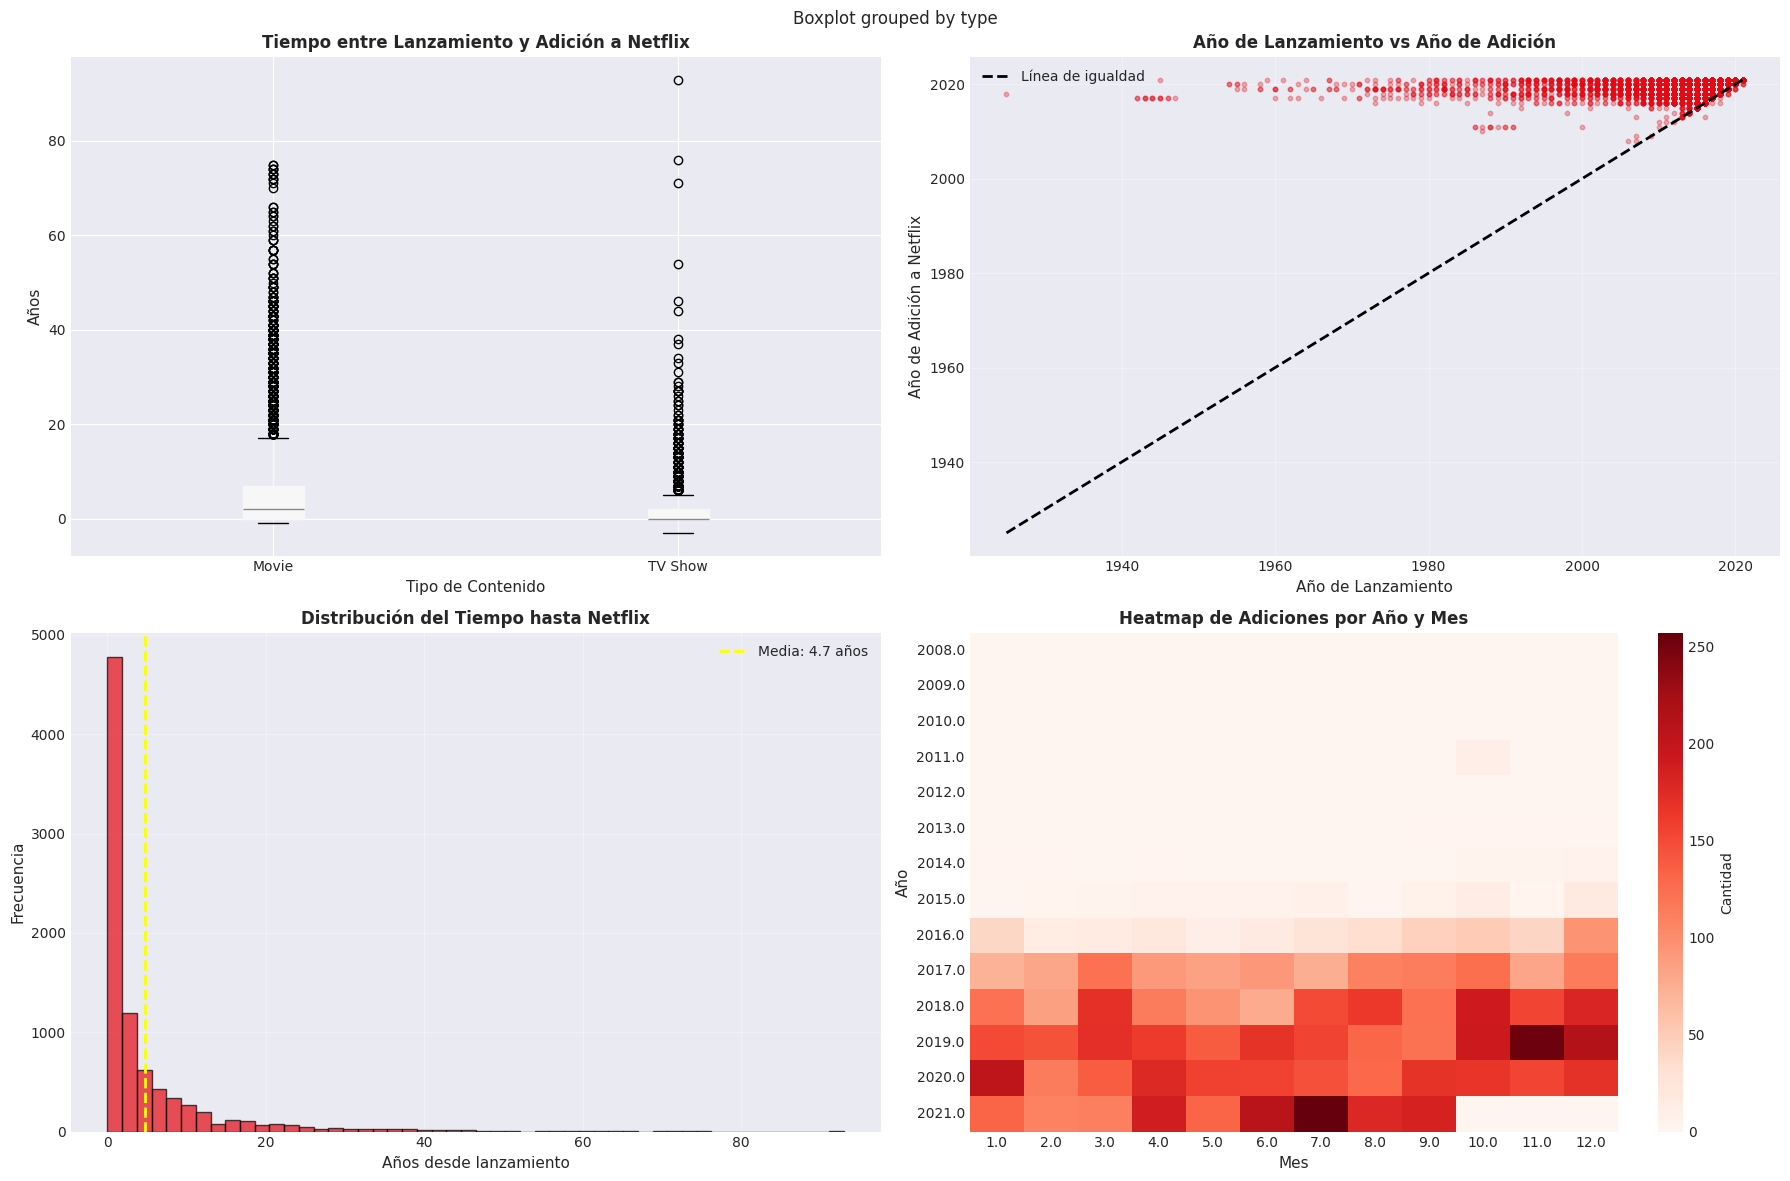


üìä INSIGHT CLAVE: Netflix a√±ade contenido relativamente reciente, con un promedio de ~4.7 a√±os desde el lanzamiento


In [26]:
# Visualizaci√≥n de patrones
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Tiempo hasta Netflix por tipo
ax1 = axes[0, 0]
df.boxplot(column='time_to_netflix', by='type', ax=ax1, patch_artist=True)
ax1.set_title('Tiempo entre Lanzamiento y Adici√≥n a Netflix', fontsize=12, fontweight='bold')
ax1.set_xlabel('Tipo de Contenido', fontsize=11)
ax1.set_ylabel('A√±os', fontsize=11)
plt.sca(ax1)
plt.xticks([1, 2], ['Movie', 'TV Show'])

# Relaci√≥n a√±o de lanzamiento vs a√±o de adici√≥n
ax2 = axes[0, 1]
scatter_data = df.dropna(subset=['release_year', 'year_added'])
ax2.scatter(scatter_data['release_year'], scatter_data['year_added'], 
            alpha=0.3, c='#E50914', s=10)
ax2.plot([scatter_data['release_year'].min(), scatter_data['release_year'].max()],
         [scatter_data['release_year'].min(), scatter_data['release_year'].max()],
         'k--', linewidth=2, label='L√≠nea de igualdad')
ax2.set_title('A√±o de Lanzamiento vs A√±o de Adici√≥n', fontsize=12, fontweight='bold')
ax2.set_xlabel('A√±o de Lanzamiento', fontsize=11)
ax2.set_ylabel('A√±o de Adici√≥n a Netflix', fontsize=11)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Distribuci√≥n de tiempo hasta Netflix
ax3 = axes[1, 0]
time_clean = df[df['time_to_netflix'] >= 0]['time_to_netflix']
ax3.hist(time_clean, bins=50, color='#E50914', edgecolor='black', alpha=0.7)
ax3.axvline(time_clean.mean(), color='yellow', linestyle='--', linewidth=2,
            label=f"Media: {time_clean.mean():.1f} a√±os")
ax3.set_title('Distribuci√≥n del Tiempo hasta Netflix', fontsize=12, fontweight='bold')
ax3.set_xlabel('A√±os desde lanzamiento', fontsize=11)
ax3.set_ylabel('Frecuencia', fontsize=11)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Heatmap de adiciones por a√±o y mes
ax4 = axes[1, 1]
heatmap_data = df.groupby(['year_added', 'month_added']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap='Reds', ax=ax4, cbar_kws={'label': 'Cantidad'})
ax4.set_title('Heatmap de Adiciones por A√±o y Mes', fontsize=12, fontweight='bold')
ax4.set_xlabel('Mes', fontsize=11)
ax4.set_ylabel('A√±o', fontsize=11)

plt.tight_layout()
plt.show()

print(f"\nüìä INSIGHT CLAVE: Netflix a√±ade contenido relativamente reciente, con un promedio de ~{time_clean.mean():.1f} a√±os desde el lanzamiento")

## 14. REPORTE EJECUTIVO DE INSIGHTS DE NEGOCIO

In [27]:
print("\n" + "="*80)
print("REPORTE EJECUTIVO - INSIGHTS DE NEGOCIO DE NETFLIX")
print("="*80)

print("""
‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë                    RESUMEN EJECUTIVO - CAT√ÅLOGO NETFLIX                    ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù

1. COMPOSICI√ìN DEL CAT√ÅLOGO
   ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
""")

movie_pct = (df['type'] == 'Movie').sum() / len(df) * 100
tv_pct = (df['type'] == 'TV Show').sum() / len(df) * 100

print(f"   ‚Ä¢ Total de t√≠tulos: {len(df):,}")
print(f"   ‚Ä¢ Pel√≠culas: {(df['type'] == 'Movie').sum():,} ({movie_pct:.1f}%)")
print(f"   ‚Ä¢ Series: {(df['type'] == 'TV Show').sum():,} ({tv_pct:.1f}%)")
print(f"\n   üí° INSIGHT: El cat√°logo est√° fuertemente orientado a pel√≠culas, representando")
print(f"      casi el 70% del contenido total.")

print("""
2. ESTRATEGIA TEMPORAL
   ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
""")

recent_content_pct = (df['release_year'] >= 2015).sum() / len(df) * 100
print(f"   ‚Ä¢ Contenido lanzado desde 2015: {(df['release_year'] >= 2015).sum():,} ({recent_content_pct:.1f}%)")
print(f"   ‚Ä¢ A√±o promedio de lanzamiento: {df['release_year'].mean():.0f}")
print(f"   ‚Ä¢ Tiempo promedio hasta Netflix: {time_clean.mean():.1f} a√±os")
print(f"\n   üí° INSIGHT: Netflix prioriza contenido moderno y reciente, con m√°s del {recent_content_pct:.0f}%")
print(f"      del cat√°logo lanzado en la √∫ltima d√©cada.")

print("""
3. DISTRIBUCI√ìN GEOGR√ÅFICA
   ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
""")

top_3_countries = top_countries.head(3)
print(f"   ‚Ä¢ Top 3 pa√≠ses productores:")
for i, (country, count) in enumerate(top_3_countries.items(), 1):
    pct = count / len(df) * 100
    print(f"     {i}. {country}: {count:,} t√≠tulos ({pct:.1f}%)")

us_content_pct = top_countries['United States'] / len(df) * 100
print(f"\n   üí° INSIGHT: Estados Unidos domina con {us_content_pct:.1f}% del cat√°logo, pero hay")
print(f"      fuerte presencia de contenido internacional (India, UK, etc.).")

print("""
4. CLASIFICACI√ìN DE CONTENIDO
   ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
""")

adult_ratings = ['TV-MA', 'R', 'NC-17']
adult_content_pct = df[df['rating'].isin(adult_ratings)].shape[0] / len(df) * 100
print(f"   ‚Ä¢ Contenido para adultos (TV-MA, R): {adult_content_pct:.1f}%")
print(f"   ‚Ä¢ Top 3 ratings: {', '.join(rating_dist.head(3).index.tolist())}")
print(f"\n   üí° INSIGHT: Predominio de contenido para audiencias maduras, con {adult_content_pct:.1f}%")
print(f"      clasificado para adultos.")

print("""
5. G√âNEROS Y CONTENIDO
   ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
""")

top_3_genres = top_genres.head(3)
print(f"   ‚Ä¢ Top 3 g√©neros:")
for i, (genre, count) in enumerate(top_3_genres.items(), 1):
    print(f"     {i}. {genre}: {count:,} t√≠tulos")

print(f"\n   üí° INSIGHT: Fuerte enfoque en dramas internacionales, comedias y documentales,")
print(f"      reflejando una estrategia de diversidad de contenido global.")

print("""
6. CARACTER√çSTICAS DEL CONTENIDO
   ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
""")

single_season_pct = (tv_shows['seasons'] == 1).sum() / len(tv_shows) * 100
print(f"   ‚Ä¢ Duraci√≥n promedio pel√≠culas: {movies['duration_min'].mean():.0f} minutos")
print(f"   ‚Ä¢ Series con 1 temporada: {single_season_pct:.1f}%")
print(f"   ‚Ä¢ Temporadas promedio series: {tv_shows['seasons'].mean():.1f}")
print(f"\n   üí° INSIGHT: Las pel√≠culas tienen duraci√≥n est√°ndar (~90-100 min) y la mayor√≠a")
print(f"      de series son de 1 temporada, sugiriendo contenido conciso.")

print("""
7. CALIDAD DE DATOS Y COMPLETITUD
   ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
""")

completeness = (1 - df.isnull().sum() / len(df)) * 100
print(f"   ‚Ä¢ Completitud promedio: {completeness.mean():.1f}%")
print(f"   ‚Ä¢ Campos con m√°s datos faltantes:")
for col in missing_data.head(3)['Columna']:
    pct = df[col].isnull().sum() / len(df) * 100
    print(f"     - {col}: {pct:.1f}% faltante")

print(f"\n   üí° INSIGHT: Los campos de director, cast y country tienen valores faltantes,")
print(f"      requiriendo cuidado en an√°lisis que los utilicen.")

print("""
‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë                        RECOMENDACIONES ESTRAT√âGICAS                        ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù

1. DIVERSIFICACI√ìN DE CONTENIDO
   ‚Ä¢ Considerar incrementar el porcentaje de series vs pel√≠culas para mejorar
     la retenci√≥n de usuarios (las series generan engagement m√°s prolongado)

2. EXPANSI√ìN INTERNACIONAL
   ‚Ä¢ Aprovechar la tendencia de contenido internacional exitoso
   ‚Ä¢ Invertir en producciones locales de mercados emergentes

3. ESTRATEGIA DE CONTENIDO POR EDADES
   ‚Ä¢ Balancear el contenido adulto con m√°s opciones familiares
   ‚Ä¢ Desarrollar contenido espec√≠fico para nichos desatendidos

4. GESTI√ìN DE CAT√ÅLOGO
   ‚Ä¢ Continuar la tendencia de a√±adir contenido reciente
   ‚Ä¢ Mantener un balance entre contenido cl√°sico y moderno

5. CALIDAD DE DATOS
   ‚Ä¢ Implementar procesos para completar metadatos faltantes
   ‚Ä¢ Estandarizar la captura de informaci√≥n de directores y elenco

6. AN√ÅLISIS ADICIONALES RECOMENDADOS
   ‚Ä¢ An√°lisis de sentimiento en descripciones
   ‚Ä¢ Segmentaci√≥n de usuarios por preferencias de contenido
   ‚Ä¢ An√°lisis predictivo de √©xito de contenido
   ‚Ä¢ Estudio de patrones de visualizaci√≥n por tipo de contenido

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë                              FIN DEL REPORTE                               ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
""")

# Guardar resumen estad√≠stico
summary_stats = {
    'Total de t√≠tulos': len(df),
    'Pel√≠culas': (df['type'] == 'Movie').sum(),
    'Series': (df['type'] == 'TV Show').sum(),
    'Pa√≠ses √∫nicos': df['country'].str.split(', ').explode().nunique(),
    'G√©neros √∫nicos': df['listed_in'].str.split(', ').explode().nunique(),
    'Rango de a√±os': f"{df['release_year'].min()}-{df['release_year'].max()}",
    'Duraci√≥n promedio pel√≠culas (min)': f"{movies['duration_min'].mean():.1f}",
    'Temporadas promedio series': f"{tv_shows['seasons'].mean():.1f}",
    'Contenido post-2015 (%)': f"{recent_content_pct:.1f}",
    'Completitud de datos (%)': f"{completeness.mean():.1f}"
}

summary_df = pd.DataFrame(list(summary_stats.items()), columns=['M√©trica', 'Valor'])
print("\n" + "="*80)
print("RESUMEN DE M√âTRICAS CLAVE")
print("="*80)
print(summary_df.to_string(index=False))


REPORTE EJECUTIVO - INSIGHTS DE NEGOCIO DE NETFLIX

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë                    RESUMEN EJECUTIVO - CAT√ÅLOGO NETFLIX                    ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù

1. COMPOSICI√ìN DEL CAT√ÅLOGO
   ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

   ‚Ä¢ Total de t√≠tulos: 8,807
   ‚Ä¢ Pel√≠culas: 6,131 (69.6%)
   ‚Ä¢ Series: 2,676 (30.4%)

   üí° INSIGHT: El cat√°logo est√° fuertement

## 15. Exportar Datos Procesados

In [28]:
# Exportar dataset procesado
df.to_csv('netflix_titles_processed.csv', index=False)
print("Dataset procesado guardado como 'netflix_titles_processed.csv'")

# Exportar resumen de m√©tricas
summary_df.to_csv('netflix_summary_metrics.csv', index=False)
print("Resumen de m√©tricas guardado como 'netflix_summary_metrics.csv'")

print("\n‚úÖ An√°lisis completado exitosamente!")

Dataset procesado guardado como 'netflix_titles_processed.csv'
Resumen de m√©tricas guardado como 'netflix_summary_metrics.csv'

‚úÖ An√°lisis completado exitosamente!
